In [1]:
library(tidyverse)
library(cowplot)
library(ape)
library(patchwork)
library(png)
library(grid)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(magick)
library(rgeos)
library(ggnewscale)

tts <- 16
tts_small <- 11
theme_set(theme_classic(tts))
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
source("../color_df.R")


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Linking to GEOS 3.8.1, GDAL 3.1.4, PROJ 7.1.1

Linking to ImageMagick 7.0.10.28
Enabled features: cairo, fontconfig, freetype, fftw, pango, rsvg, webp, x11
Disabled features: ghostscript, lcms

Loading required package: sp

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)


`summarise()` has grouped output by 'geo'. You can override using the `.groups` argument.

Joining, by = "geo"

Warning message:
“Removed 100 rows containing missing values (position_stack).”


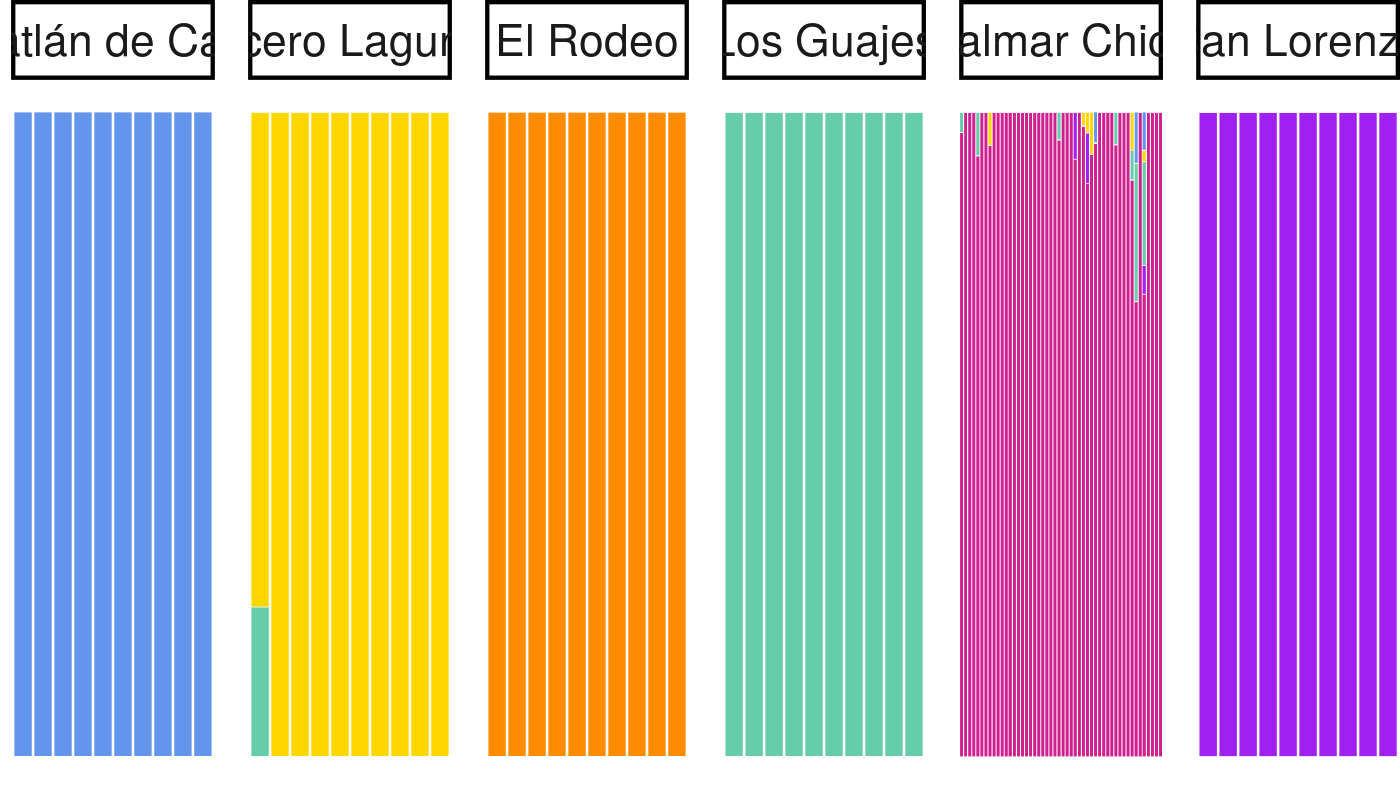

In [2]:

Q <- read_delim("../data/ngsAdmix/v5--Teo_K6.qopt", delim = " ", col_names = FALSE)
    

key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct()

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)
) %>% 
    select(-geo) %>% 
    drop_na()



Teo_structure_full <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme(
        strip.text.x = element_text(size = tts),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) + 
    scale_fill_identity()


Teo_structure_full


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)


`summarise()` has grouped output by 'geo'. You can override using the `.groups` argument.

Joining, by = "geo"



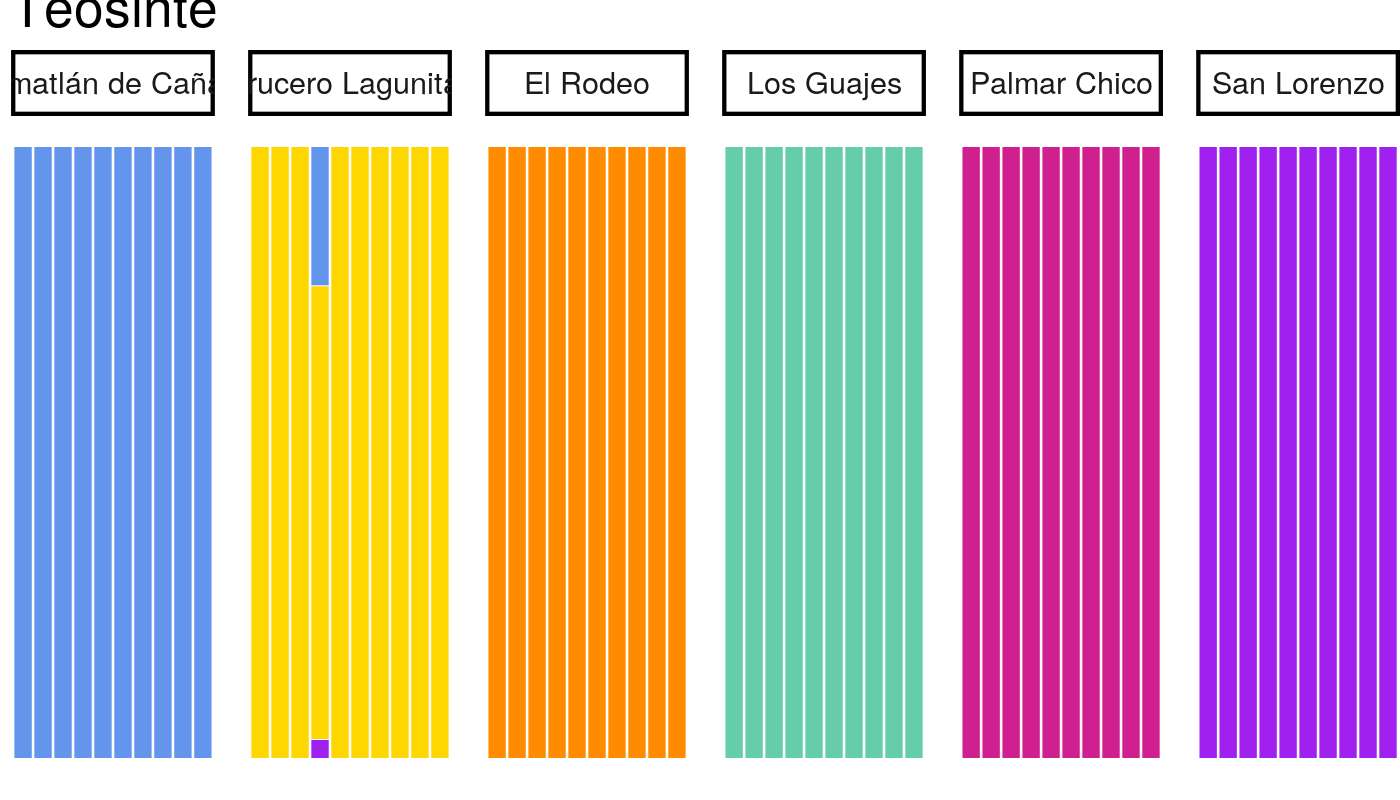

In [3]:
Q <- read_delim("../data/ngsAdmix/v5_Teo_6_thin1M_random10_PalmarChico.qopt", delim = " ", col_names = FALSE) %>% 
    select(-X7)

#barplot(t(Q), col = c("cornflowerblue", "gold",  "mediumaquamarine",  "purple", "violetred"))

source("../color_df.R")
  
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    group_by(geo) %>% 
    sample_n(10, replace = FALSE)

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)) %>% 
    select(-geo) %>% 
    drop_na()


Teo_structure_10 <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme(
        strip.text.x = element_text(size = tts_small),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_identity()



Teo_structure_10 + ggtitle("Teosinte")
#scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)




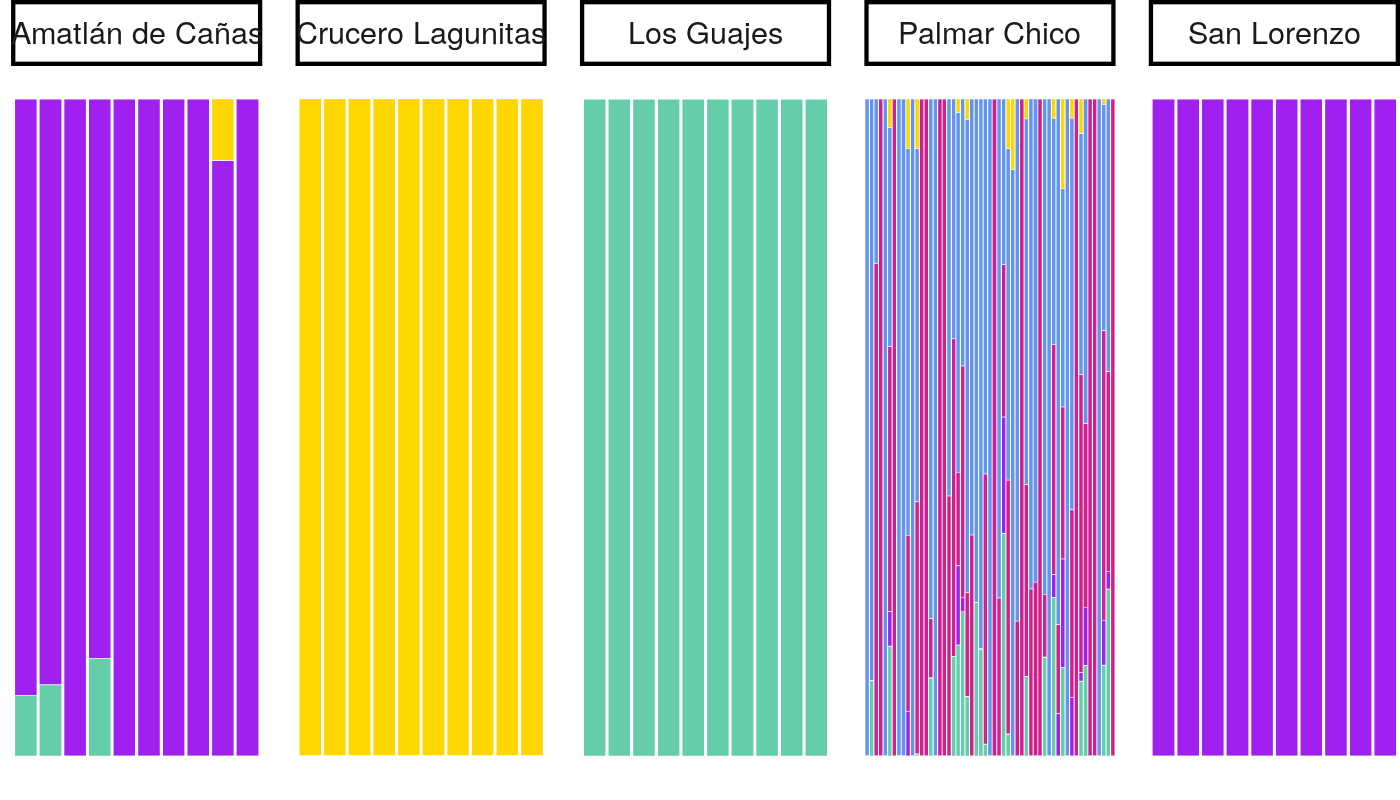

In [4]:
source("../color_df.R")

Q <- read_delim("../data/ngsAdmix/v5--LR_K5.qopt", delim = " ", col_names = FALSE)
    
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "LR", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    drop_na()

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


LR_key  <- 
full_join(
tibble(
    geo = c("Amatlan_de_Canas", "Crucero_Lagunitas", "Los_Guajes", "San_Lorenzo", "Palmar_Chico"),
    bin = c("X2", "X1", "X5", "X4", "X3")
),
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(), by = "geo") %>% 
    drop_na()


LR_stucture_full <- 
Q_df %>%
    drop_na() %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = bin)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme(
        strip.text.x = element_text(size = tts_small),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))

LR_stucture_full


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)


`summarise()` has grouped output by 'geo'. You can override using the `.groups` argument.

Joining, by = "geo"



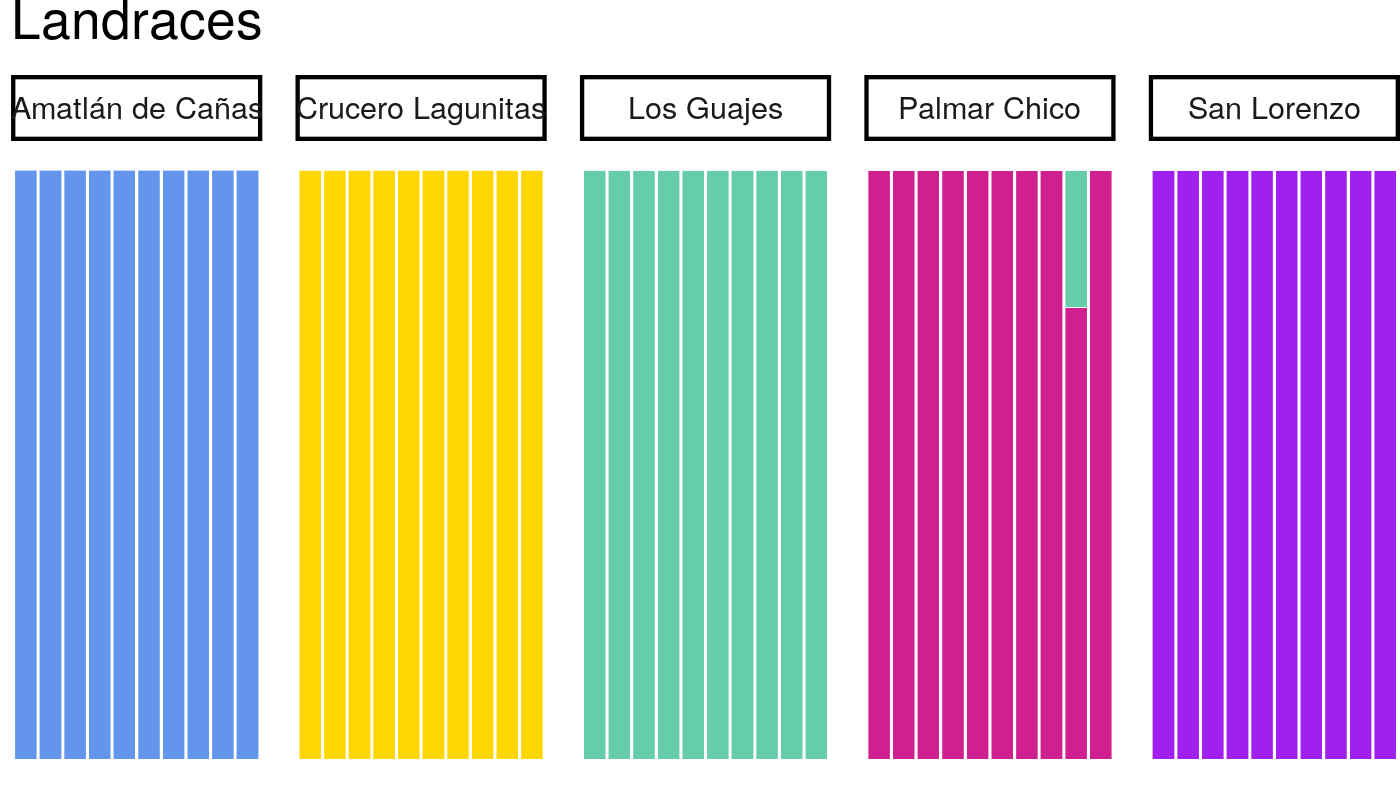

In [5]:
Q <- read_delim("../data/ngsAdmix/v5_LR_5_thin1M_random10_PalmarChico.qopt", delim = " ", col_names = FALSE) %>% 
    select(-X6)

#barplot(t(Q), col = c("cornflowerblue", "gold",  "mediumaquamarine",  "purple", "violetred"))

source("../color_df.R")
  
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "LR", !grepl("random", geo)) %>% 
    select(JRIAL_ID, geo) %>% 
    distinct() %>% 
    group_by(geo) %>% 
    sample_n(10, replace = FALSE)

Q_df <- 
    bind_cols(Q, key) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop))


color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)) %>% 
    select(-geo) %>% 
    drop_na()

LR_structure_10 <- 
Q_df %>%
    full_join(., color_key, by = "bin") %>% 
    mutate(geo = str_replace_all(geo, "_", " "), geo = str_replace_all(geo,"Amatlan de Canas","Amatlán de Cañas")) %>% 
    ggplot(aes(JRIAL_ID, prop, fill = color)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme(
        strip.text.x = element_text(size = tts_small),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(0, 0, 0, 0, "cm")
    ) +
    scale_fill_identity()

LR_structure_10 + ggtitle("Landraces")
#scale_fill_manual(values = c(X2 = "cornflowerblue", X1 = "gold", X5 = "mediumaquamarine", X4 = "purple", X3 = "violetred", X6 = "cyan", X7 = "dodgerblue"))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_logical()
)



── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

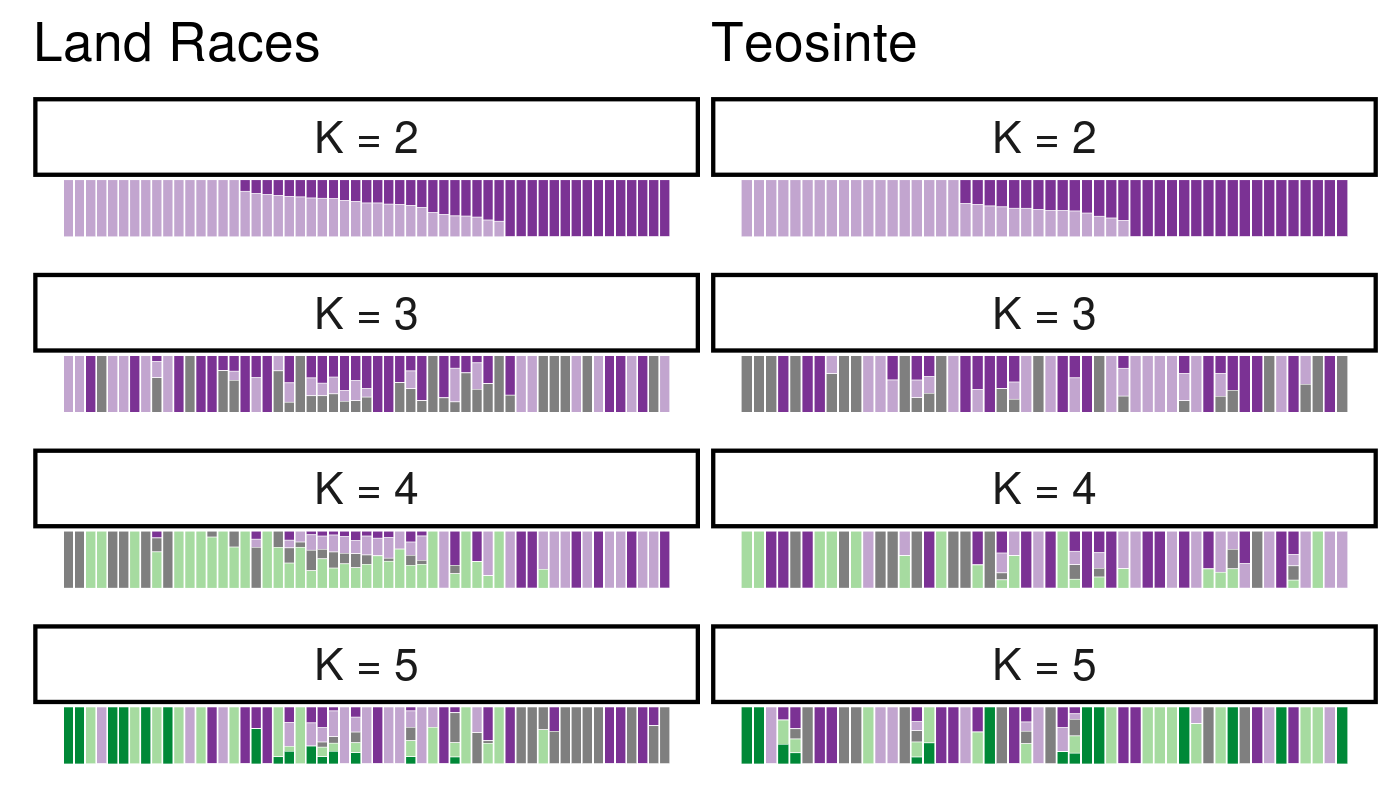

In [6]:
chico_plot <- function(files, k_vec){
    
    row_order <- read_delim(str_glue("../data/ngsAdmix/{chicos[1]}"), delim = " ", col_names = FALSE) %>% 
    mutate(rown = 1:n()) %>% 
    arrange(X1) %>% 
    pull(rown)

    Q <- seq_along(chicos)  %>% 
        map_df(~ {
            read_delim(str_glue("../data/ngsAdmix/{chicos[.x]}"), delim = " ", col_names = FALSE) %>% 
            slice(row_order) %>% 
            mutate(ind = 1:n()) %>% 
            pivot_longer(cols = -ind, names_to = "bin", values_to = "prop") %>% 
            mutate(K = K[.x])
        }) %>% 
        drop_na()

    structure_chicos <- Q %>%
        mutate(K = paste0("K = ", K)) %>%
        ggplot(aes(ind, prop, fill = bin)) +
        geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
        facet_wrap(~K, scales = "free", ncol = 1) +
        theme(
            strip.text.x = element_text(size = tts),
            legend.position = "n",
            line = element_blank(),
            axis.title.y = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.y = element_blank(),
            axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            plot.margin = margin(0, 0, 0, 0, "cm")
        ) +
        scale_fill_manual(values = c(X1 = "#7b3294", X2 = "#c2a5cf", X3 = "grey50", X4 = "#a6dba0", X5 = "#008837"))

    structure_chicos
}


chicos <- list.files(path = "../data/ngsAdmix/", "v5_LR_([0-9])_thin1M_PalmarChicoONLY.qopt")
K <- str_replace(chicos, "v5_LR_([0-9])_thin1M_PalmarChicoONLY.qopt", "\\1")

LR_chicos <- chico_plot(chicos, K)

chicos <- list.files(path = "../data/ngsAdmix/", "v5_Teo_([0-9])_thin1M_PalmarChicoONLY.qopt")
K <- str_replace(chicos, "v5_Teo_([0-9])_thin1M_PalmarChicoONLY.qopt", "\\1")

Teo_chicos <- chico_plot(chicos, K)


LR_chicos + ggtitle("Land Races") + Teo_chicos + ggtitle("Teosinte")

Warning message in st_centroid.sf(world):
“st_centroid assumes attributes are constant over geometries of x”
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message in st_centroid.sfc(world$geometry):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message:
“Duplicated aesthetics after name standardisation: size”


[1] 16.35 20.82

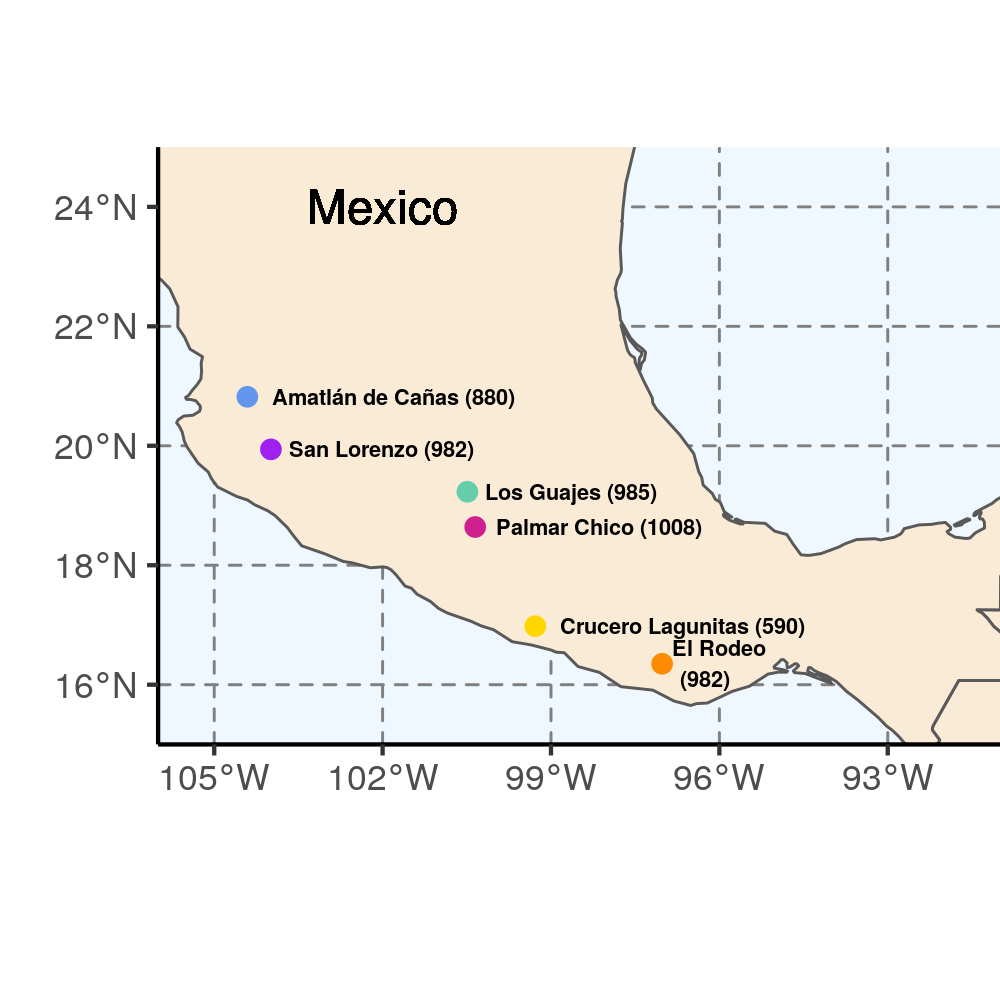

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

world <- ne_countries(scale = "medium", returnclass = "sf")
world_points <- st_centroid(world)
world_points <- cbind(world, st_coordinates(st_centroid(world$geometry)))

latlong_df <- 
    tibble(
    population = c("Crucero Lagunitas (590)", "Amatlán de Cañas (880)", "El Rodeo\n\ \ (982)", "Los Guajes (985)", "San Lorenzo (982)", "Palmar Chico (1008)"),
    color = c("gold", "cornflowerblue", "darkorange", "mediumaquamarine", "purple", "violetred"),
    Latitude = c(16.98, 20.82, 16.35, 19.23, 19.94, 18.64),
    Longitude = c(-99.28, -104.41, -97.02, -100.49, -103.99, -100.35),
    altitude = c(590, 880, 982, 985, 982, 1008)
    )

pop_map <- ggplot(data = world) +
    geom_sf(fill= "antiquewhite") +
    coord_sf(xlim = c(-106, -91), ylim = c(15, 25), expand = FALSE) +
    scale_x_continuous(breaks = seq(-105, -90, by = 3)) +
    geom_text(mapping = aes(label = "Mexico", -102, 24), size = 6, colour = "black") +
    geom_point(data = latlong_df, mapping = aes(Longitude, Latitude, colour = color), size = 3, lwd = 2, show.legend = FALSE) +
    scale_color_identity() +
    new_scale_color() +
    #geom_text(data = latlong_df, mapping = aes(label = population, Longitude, Latitude, colour = altitude), size = 2, fontface = "bold", hjust = -0.2) +
    geom_text(data = latlong_df, mapping = aes(label = population, Longitude, Latitude), size = 2.75, fontface = "bold", hjust = -0.1) +
    scale_color_continuous() +
    theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), 
          panel.background = element_rect(fill = "aliceblue"),
          plot.margin = margin(0, 0, 0, 0, "cm")) +
    ylab("") +
    xlab("")

range(latlong_df$Latitude)

pop_map

# F4 TESTS

focal_pop,type,z
<glue>,<chr>,<dbl>
Crucero_Lagunitas,sympatric,5.16104
Crucero_Lagunitas,sympatric,5.16104
Crucero_Lagunitas,sympatric,3.87289
Crucero_Lagunitas,sympatric,3.87289
Crucero_Lagunitas,allopatric,3.23754
Crucero_Lagunitas,allopatric,1.20539


ssp_A,pop_A,ssp_B,pop_B,ssp_C,pop_C,ssp_D,pop_D,f4,se,z,type,focal_ssp,focal_pop,max_rep,color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Crucero Lagunitas,-0.000414881,0.000238238,-1.741460,sympatric,Teo,Crucero Lagunitas,2,gold
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Palmar Chico,0.000553634,0.000187130,2.958560,allopatric,Teo,Crucero Lagunitas,1,gold
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Los Guajes,0.000623495,0.000194683,3.202620,allopatric,Teo,Crucero Lagunitas,1,gold
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Amatlan de Canas,0.000464821,0.000167942,2.767750,allopatric,Teo,Crucero Lagunitas,1,gold
Teo,Crucero Lagunitas,Teo,Amatlan de Canas,LR,San Lorenzo,LR,Crucero Lagunitas,-0.001095990,0.000254571,-4.305270,sympatric,Teo,Crucero Lagunitas,2,gold
Teo,Crucero Lagunitas,Teo,Palmar Chico,LR,San Lorenzo,LR,Crucero Lagunitas,0.000152084,0.000180151,0.844201,sympatric,Teo,Crucero Lagunitas,2,gold



Call:
lm(formula = abs(z) ~ focal_pop * type, data = focal_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2682 -1.0652 -0.3267  0.6655  4.7295 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.93207    0.22425   8.616   <2e-16
focal_popCrucero_Lagunitas                0.35659    0.31713   1.124    0.262
focal_popLos_Guajes                      -0.13346    0.31713  -0.421    0.674
focal_popPalmar_Chico                    -0.11339    0.31713  -0.358    0.721
focal_popSan_Lorenzo                      0.04171    0.31713   0.132    0.895
typesympatric                             0.02677    0.34101   0.078    0.937
focal_popCrucero_Lagunitas:typesympatric -0.13584    0.48226  -0.282    0.778
focal_popLos_Guajes:typesympatric        -0.46134    0.48226  -0.957    0.339
focal_popPalmar_Chico:typesympatric      -0.19991    0.48226  -0.415    0.679
focal_popSan_Lorenzo:typesympatric       -0.628


Call:
lm(formula = abs(z) ~ factor(is_CL), data = f4_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6429 -1.0102 -0.3610  0.7566  5.0279 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.8489     0.1404  20.289   <2e-16 ***
factor(is_CL)21  -1.3287     0.1620  -8.202    4e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.347 on 368 degrees of freedom
Multiple R-squared:  0.1546,	Adjusted R-squared:  0.1523 
F-statistic: 67.27 on 1 and 368 DF,  p-value: 3.999e-15


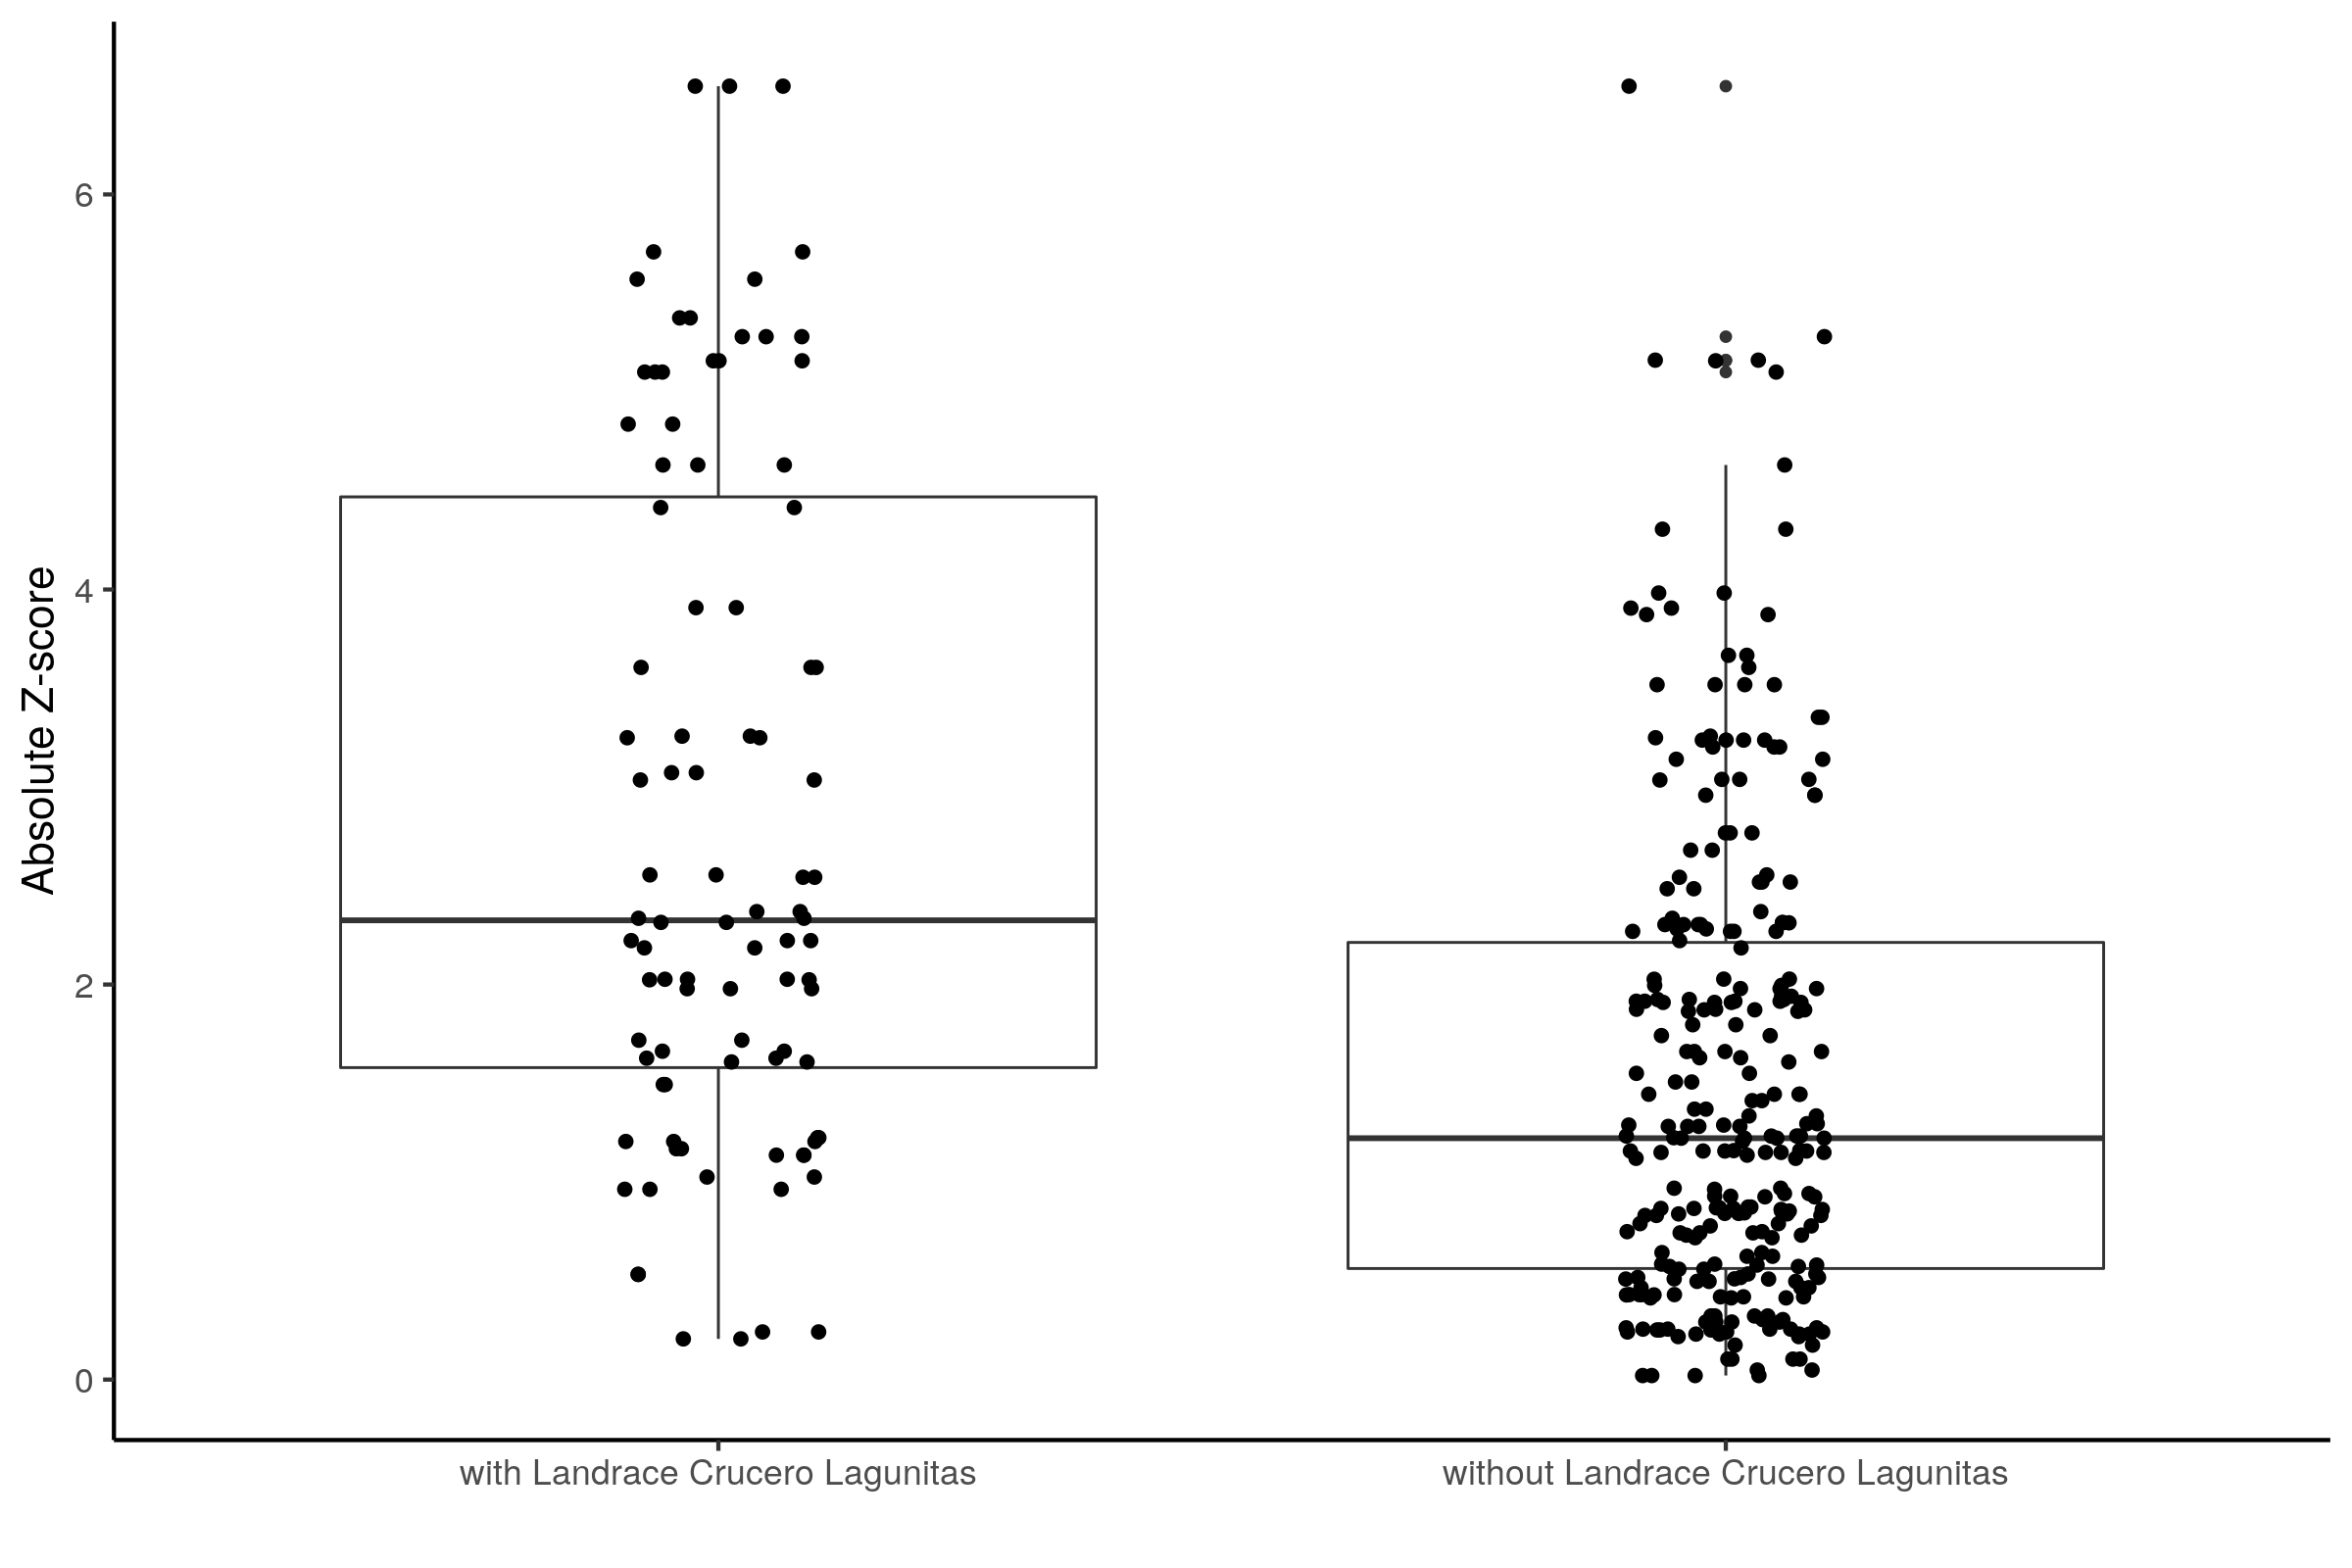

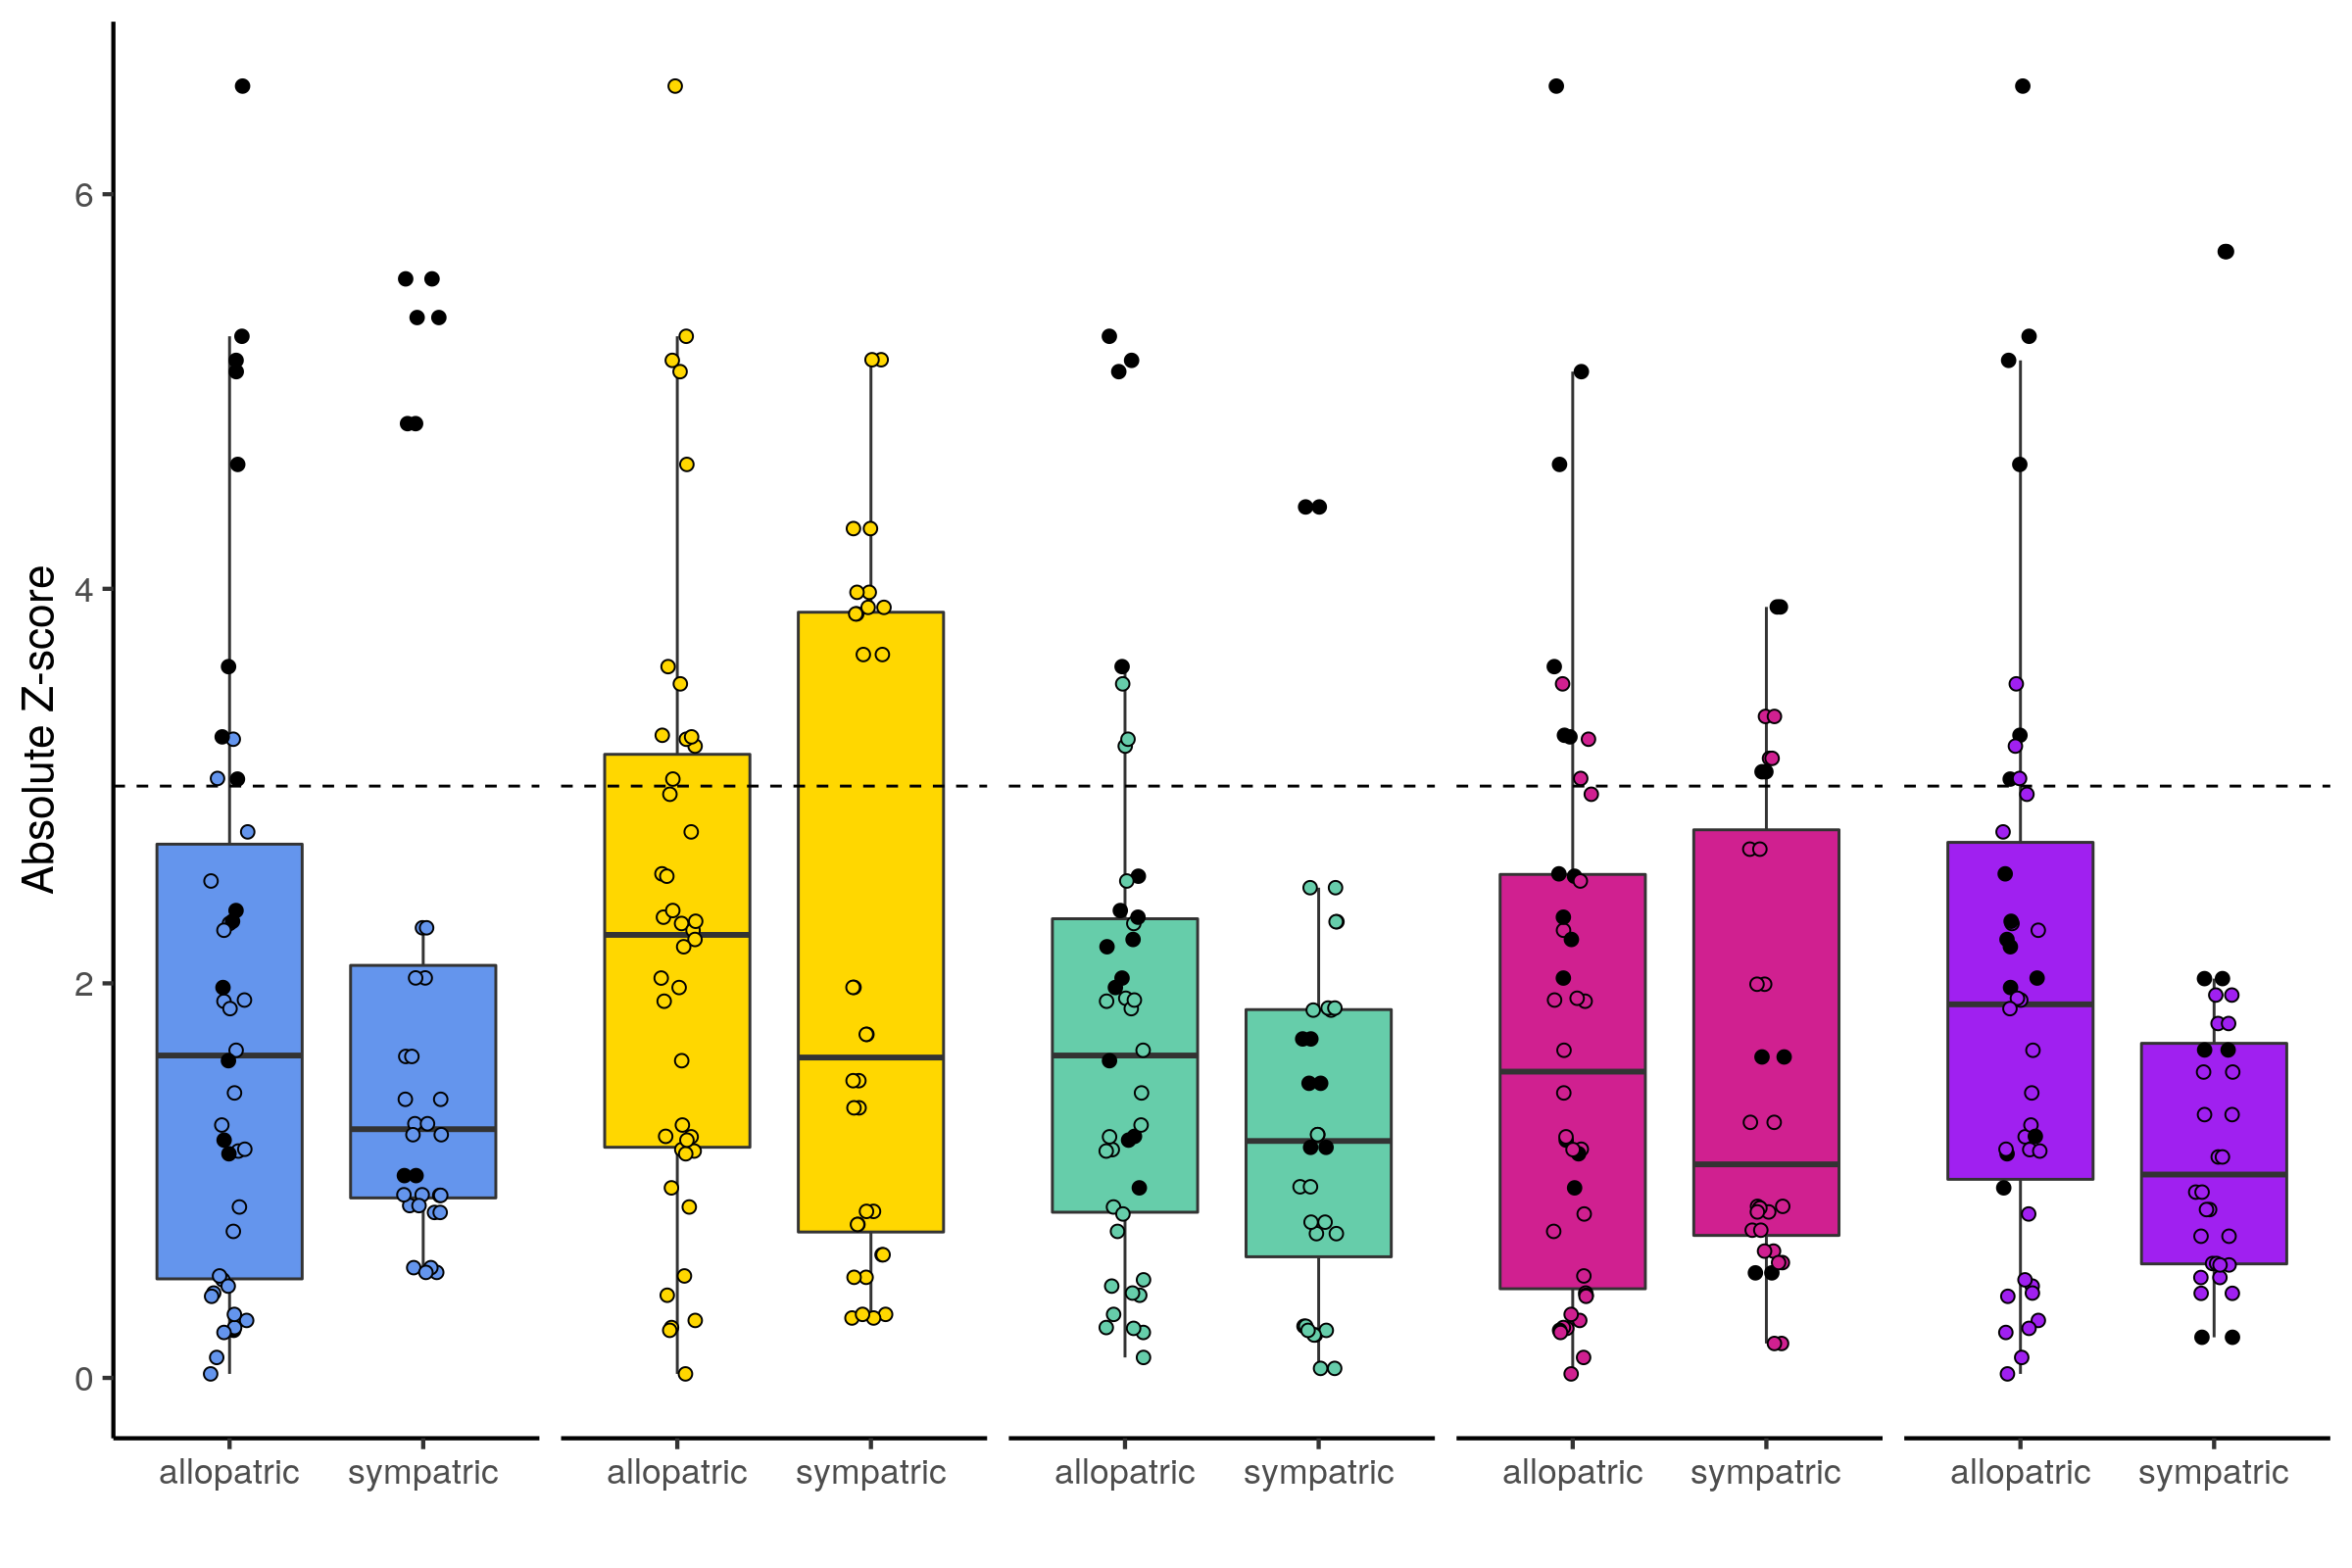

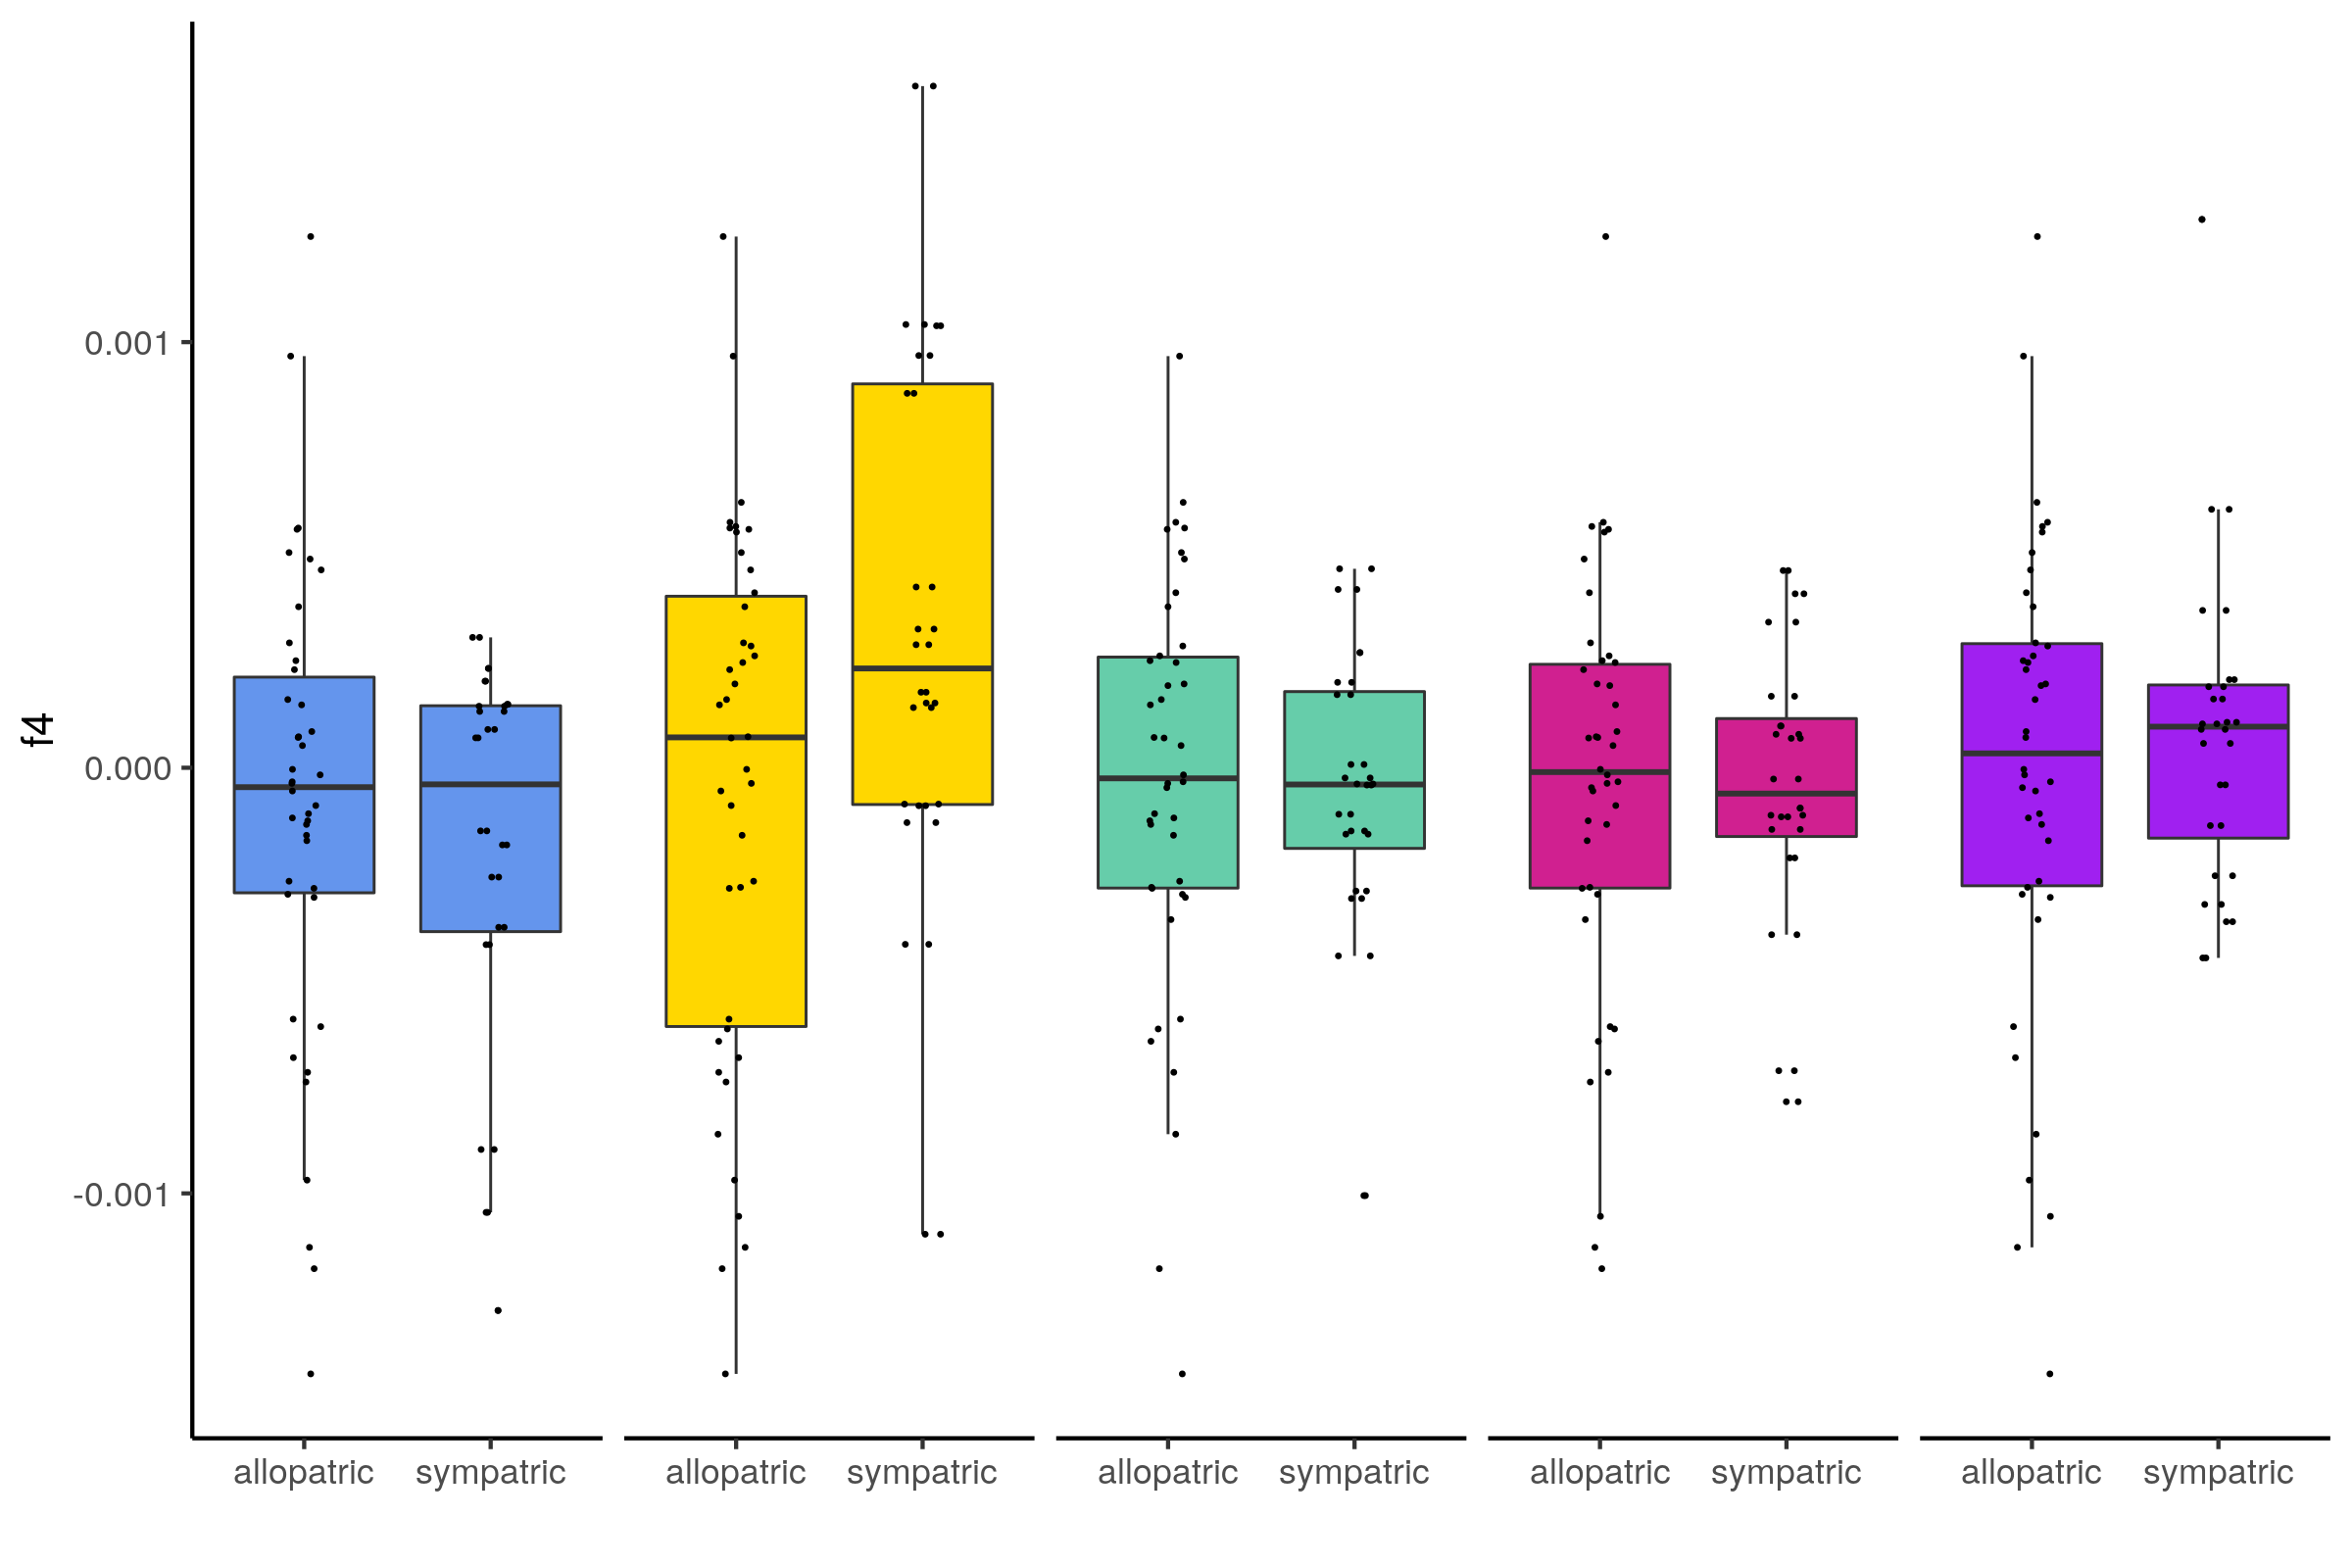

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)

cmd <- 'grep -v "Estimating" ../data/angsd_treemix/v5_treemix_filtered.fourpop.txt |  grep -v "total" | grep -v "\\-\\-Palmar_Chico" | grep -v "\\-\\-random2_Palmar_Chico"'
f4_df <- read.table(text = system(cmd, intern = T), skip = 1, col.names = c("tips", "f4", "se", "z")) %>% 
  mutate(tips = str_replace_all(tips, "random(1|2)_", "")) %>% 
  separate(tips, sep = ";", into = c("left", "right")) %>% 
  separate(left, sep = ",", into = c("A", "B")) %>% 
  separate(right, sep = ",", into = c("C", "D")) %>% 
  separate(A, sep = "--", into = c("ssp_A", "pop_A")) %>% 
  separate(B, sep = "--", into = c("ssp_B", "pop_B")) %>% 
  separate(C, sep = "--", into = c("ssp_C", "pop_C")) %>% 
  separate(D, sep = "--", into = c("ssp_D", "pop_D"))


focal_ssps <- c("Teo", "LR")
#focal_ssps <- c("Teo")
focal_pops <- unique(c(f4_df$pop_A, f4_df$pop_B, f4_df$pop_C, f4_df$pop_D))
focal_pops  <- focal_pops[focal_pops != "El_Rodeo"]

focal_df <- 
map_df(focal_ssps, function(focal_ssp){
    map_df(focal_pops, function(focal_pop){

        
        #get trees that have: 
            #topology (LR LR;Teo Teo) OR (Teo Teo; LR LR)
            #contains the focal 
        f4_df %>% 
        filter((ssp_A == focal_ssp & ssp_B == focal_ssp) & 
               (ssp_C != focal_ssp & ssp_D != focal_ssp) | 
               (ssp_A != focal_ssp & ssp_B != focal_ssp) & 
               (ssp_C == focal_ssp & ssp_D == focal_ssp))  %>% 
        filter(
            (ssp_A == focal_ssp & pop_A == focal_pop) |  
            (ssp_B == focal_ssp & pop_B == focal_pop) | 
            (ssp_C == focal_ssp & pop_C == focal_pop) | 
            (ssp_D == focal_ssp & pop_D == focal_pop)
        ) %>%  
        mutate(
        type = case_when(
          (ssp_A == ssp_B & ssp_C == ssp_D & ssp_A != ssp_D & pop_A == focal_pop & pop_C == focal_pop) | 
          (ssp_A == ssp_B & ssp_C == ssp_D & ssp_A != ssp_D & pop_A == focal_pop & pop_D == focal_pop) |
          (ssp_A == ssp_B & ssp_C == ssp_D & ssp_A != ssp_D & pop_B == focal_pop & pop_C == focal_pop) |
          (ssp_A == ssp_B & ssp_C == ssp_D & ssp_A != ssp_D & pop_B == focal_pop & pop_D == focal_pop) 
          ~ "sympatric",
          TRUE ~ "allopatric"
        ) 
      ) %>% 
        mutate(focal_ssp = str_glue("{focal_ssp}"),
               focal_pop = str_glue("{focal_pop}")) %>% 
        rowwise() %>% 
        mutate(max_rep = prod(table(c(pop_A, pop_B, pop_C, pop_D)))) %>% 
        filter(type == "sympatric" & max_rep <= 2 | type != "sympatric" & max_rep <= 1)
        
    })
})


c_df <- 
color_df %>% 
    mutate(pop = str_remove(string = pop, "(LR_|Teo_)"),
           pop = str_remove(string = pop, "(random1_|random2_)")) %>% 
    distinct()

f4_df  <- 
    focal_df %>% 
    left_join(., c_df, by = c("focal_pop" = "pop")) %>% 
    mutate_if(is.character, str_replace_all, pattern = "_",  replacement = " ") %>% 
    rowwise() %>% 
    mutate(is_CL = ifelse( focal_pop !=  "Crucero Lagunitas" & 
                          ((ssp_A == "LR" & pop_A == "Crucero Lagunitas") | 
                          (ssp_B == "LR" & pop_B == "Crucero Lagunitas")| 
                          (ssp_C == "LR" & pop_C == "Crucero Lagunitas") | 
                          (ssp_D == "LR" & pop_D == "Crucero Lagunitas")), 19, 21)) %>% 
    ungroup()

f4_plot  <- 
f4_df %>% 
    ggplot(aes(type, abs(z), fill = color)) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(aes(shape = is_CL), height = 0, width = 0.1, size = 2) +
    geom_hline(yintercept = 3, lty = 2) +
    facet_wrap(~focal_pop, nrow = 1, scales = "fixed") +
    xlab("") +
    ylab("Absolute Z-score") +
    scale_fill_identity() +
    scale_shape_identity() +
    theme(
        strip.background = element_blank(),
        strip.text.x = element_blank()
    )


cl_boxplot <- 
f4_df %>% 
    ggplot(aes(factor(is_CL), abs(z))) +
    geom_boxplot() +
    geom_jitter(width = 0.1, size = 2) +
    xlab("") +
    ylab("Absolute Z-score") +
    scale_x_discrete(labels = c("with Landrace Crucero Lagunitas", "without Landrace Crucero Lagunitas")) +
    ggsave("../figures/supplement_f4.pdf", width = 10, height = 12)
cl_boxplot
    

focal_df %>% 
    filter(focal_pop == "Crucero_Lagunitas") %>% 
    arrange(pop_A, pop_B, pop_C, pop_D) %>% 
    select(focal_pop, type, z) %>% 
    head()


focal_df %>% 
    left_join(., c_df, by = c("focal_pop" = "pop")) %>% 
    mutate_if(is.character, str_replace_all, pattern = "_",  replacement = " ") %>% 
    head()

mod <- lm(abs(z) ~ focal_pop*type, data = focal_df)
summary(mod)



mod <- lm(abs(z) ~ factor(is_CL), data = f4_df)
summary(mod)


f4_plot

focal_df %>% 
    left_join(., c_df, by = c("focal_pop" = "pop")) %>% 
    mutate_if(is.character, str_replace_all, pattern = "_",  replacement = " ") %>% 
    ggplot(aes(type, f4, fill = color)) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(height = 0, width = 0.1, size = 0.5) +
    facet_wrap(~focal_pop, nrow = 1, scales = "fixed") +
    xlab("") +
    ylab("f4") +
    scale_fill_identity() +
    theme(
        strip.background = element_blank(),
        strip.text.x = element_blank()
    )



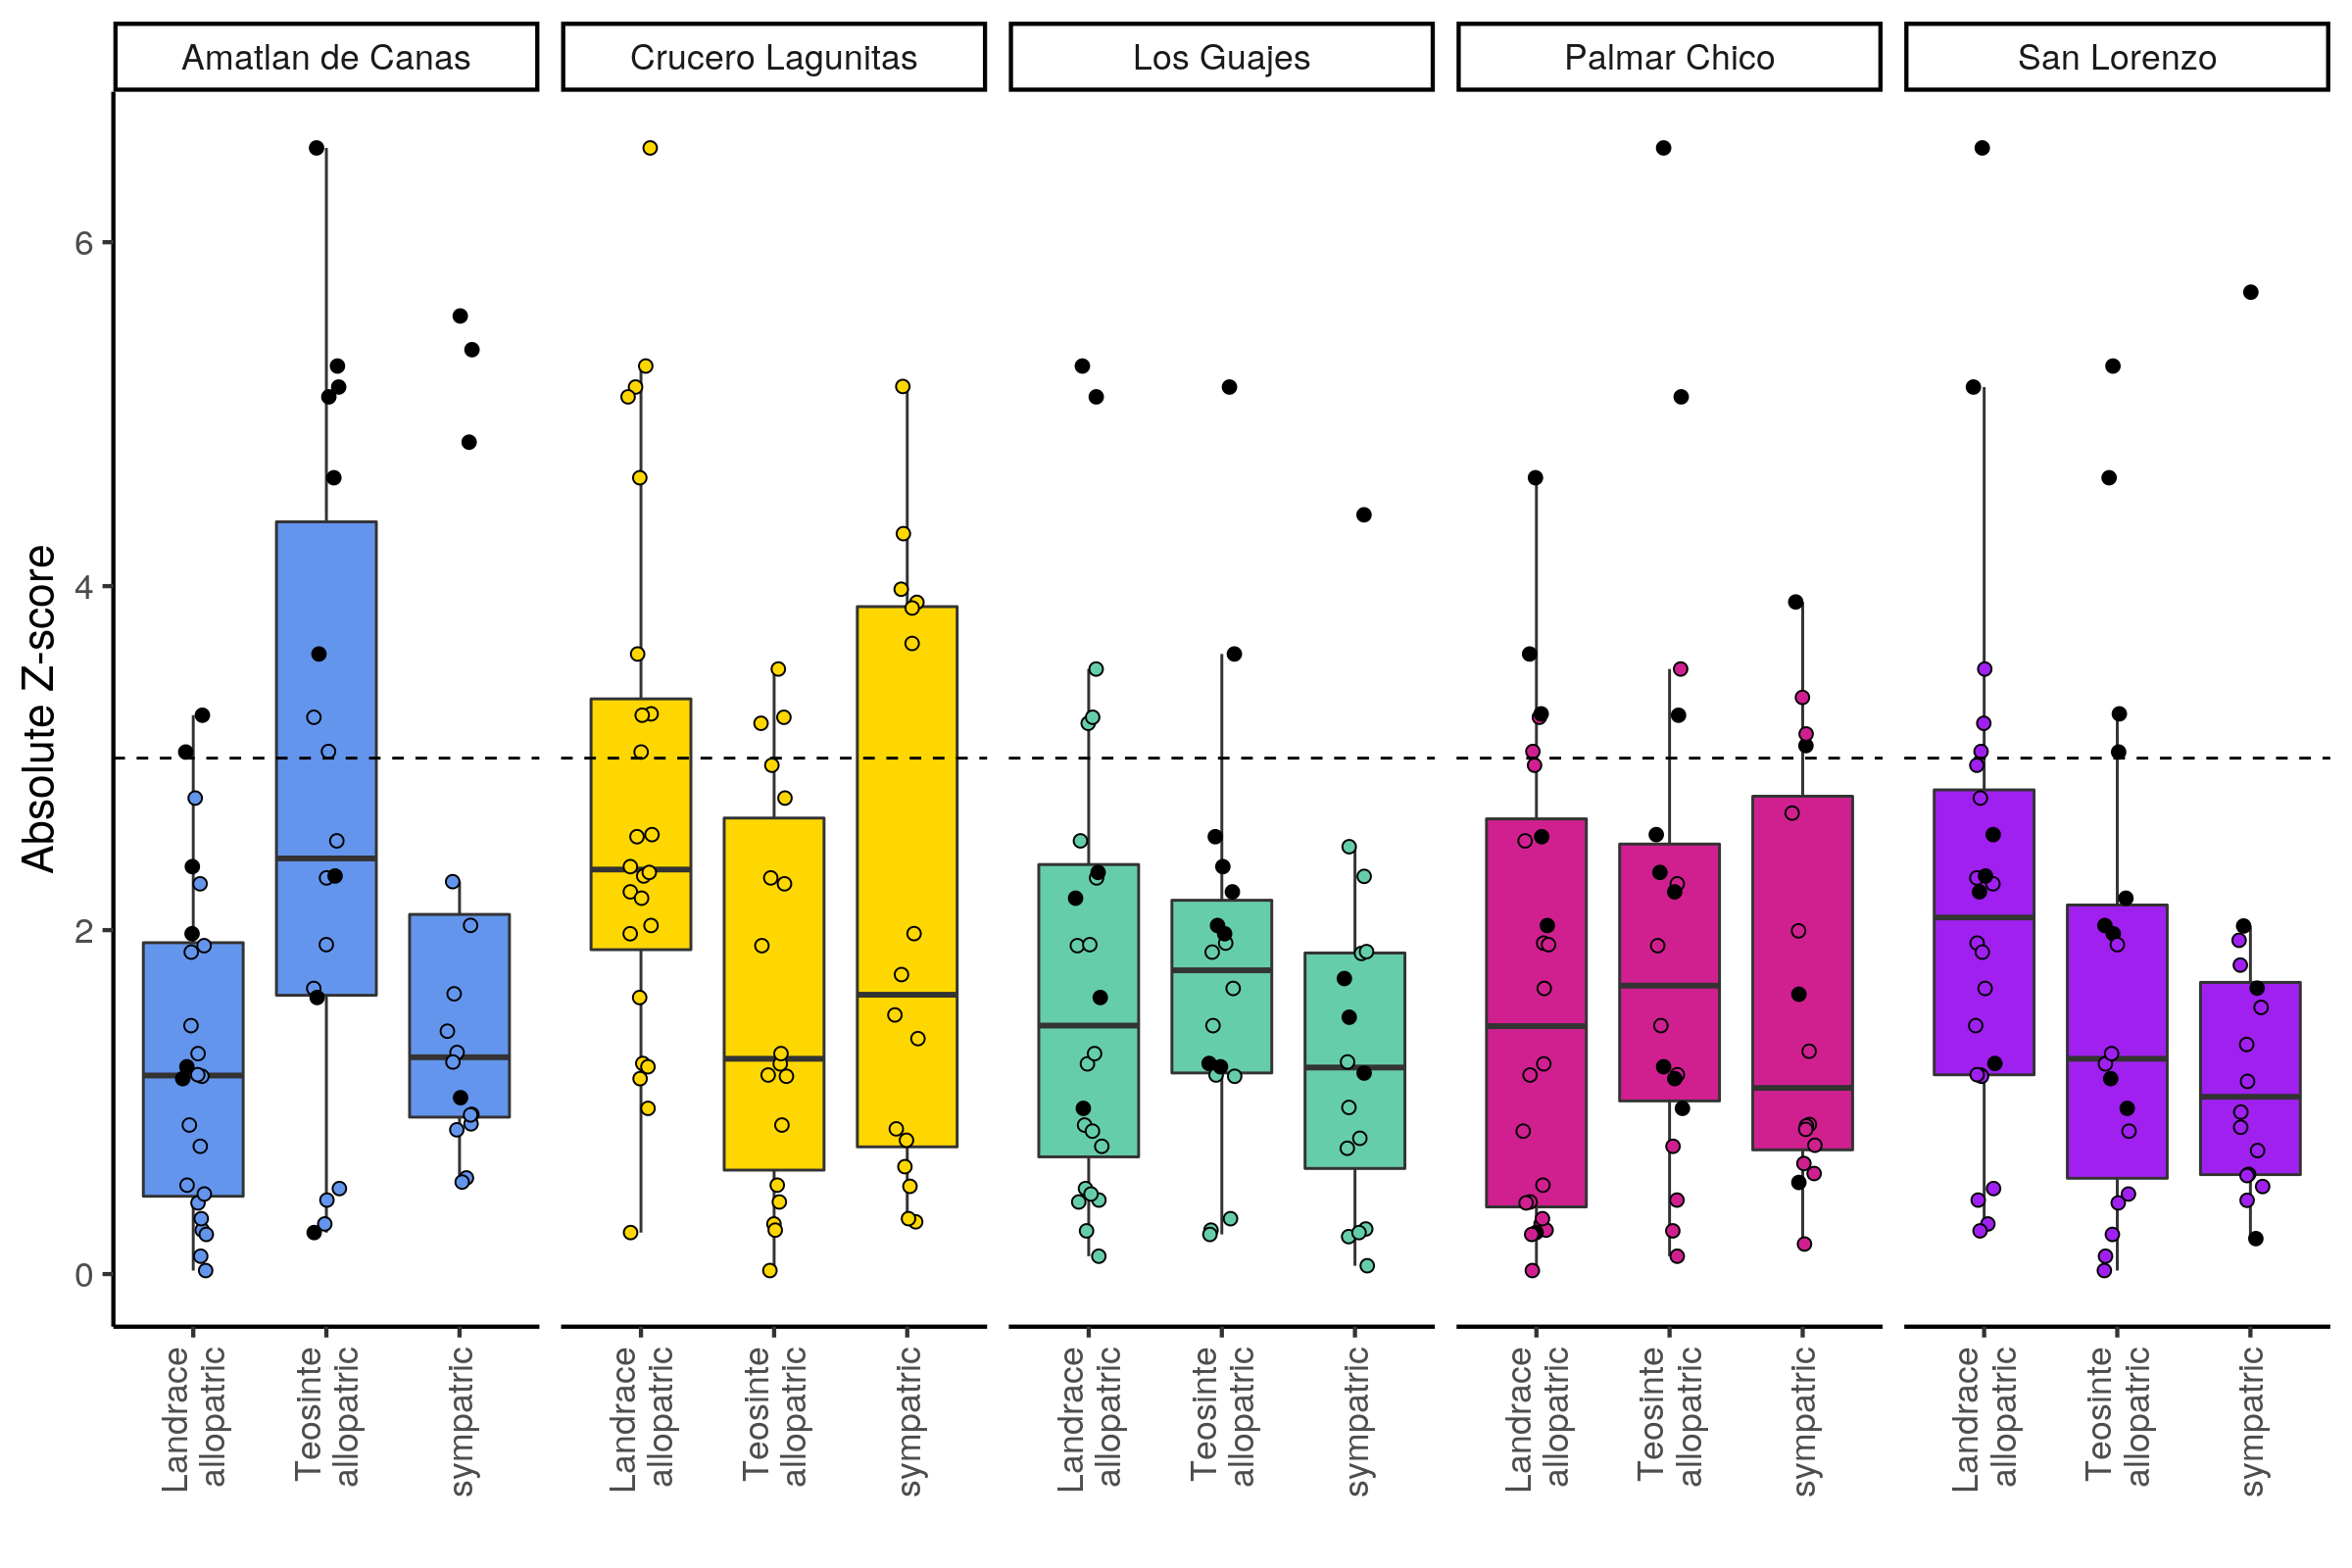

In [38]:
levs <- c("Landrace\nallopatric", "Teosinte\nallopatric", "sympatric")
f4_plot <- 
f4_df %>% 
    mutate(
        type2 = case_when(
            type == "sympatric" & focal_ssp == "LR" ~ "remove",
            type == "sympatric" & focal_ssp == "Teo" ~ "sympatric",
            type == "allopatric" & focal_ssp == "Teo" ~ "Teosinte\nallopatric",
            type == "allopatric" & focal_ssp == "LR" ~ "Landrace\nallopatric",
        )
    ) %>% 
    filter(type2 != "remove") %>%
    mutate(type2 = factor(type2, levels = levs)) %>% 
    ggplot(aes(type2, abs(z), fill = color)) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(aes(shape = is_CL), height = 0, width = 0.1, size = 2) +
    geom_hline(yintercept = 3, lty = 2) +
    facet_wrap(~focal_pop, nrow = 1, scales = "fixed") +
    xlab("") +
    ylab("Absolute Z-score") +
    scale_fill_identity() +
    scale_shape_identity() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_x_discrete(guide = guide_axis(n.dodge = 1))

f4_plot

In [39]:
focal_df %>% 
    left_join(., c_df, by = c("focal_pop" = "pop")) %>% 
    mutate_if(is.character, str_replace_all, pattern = "_",  replacement = " ") %>%
    rowwise() %>% 
    mutate(is_PC = ifelse(pop_A == "Palmar Chico" | pop_B == "Palmar Chico" | pop_C == "Palmar Chico" | pop_D == "Palmar Chico", TRUE, FALSE)) %>% 
    ungroup()

ssp_A,pop_A,ssp_B,pop_B,ssp_C,pop_C,ssp_D,pop_D,f4,se,z,type,focal_ssp,focal_pop,max_rep,color,is_PC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Crucero Lagunitas,-4.14881e-04,0.000238238,-1.741460,sympatric,Teo,Crucero Lagunitas,2,gold,FALSE
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Palmar Chico,5.53634e-04,0.000187130,2.958560,allopatric,Teo,Crucero Lagunitas,1,gold,TRUE
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Los Guajes,6.23495e-04,0.000194683,3.202620,allopatric,Teo,Crucero Lagunitas,1,gold,FALSE
Teo,Crucero Lagunitas,Teo,El Rodeo,LR,San Lorenzo,LR,Amatlan de Canas,4.64821e-04,0.000167942,2.767750,allopatric,Teo,Crucero Lagunitas,1,gold,FALSE
Teo,Crucero Lagunitas,Teo,Amatlan de Canas,LR,San Lorenzo,LR,Crucero Lagunitas,-1.09599e-03,0.000254571,-4.305270,sympatric,Teo,Crucero Lagunitas,2,gold,FALSE
Teo,Crucero Lagunitas,Teo,Palmar Chico,LR,San Lorenzo,LR,Crucero Lagunitas,1.52084e-04,0.000180151,0.844201,sympatric,Teo,Crucero Lagunitas,2,gold,TRUE
Teo,Crucero Lagunitas,Teo,Los Guajes,LR,San Lorenzo,LR,Crucero Lagunitas,-1.28867e-04,0.000206389,-0.624392,sympatric,Teo,Crucero Lagunitas,2,gold,FALSE
Teo,Crucero Lagunitas,Teo,Amatlan de Canas,LR,San Lorenzo,LR,Palmar Chico,-5.46092e-05,0.000187410,-0.291389,allopatric,Teo,Crucero Lagunitas,1,gold,TRUE
Teo,Crucero Lagunitas,Teo,Los Guajes,LR,San Lorenzo,LR,Palmar Chico,1.96945e-04,0.000170176,1.157300,allopatric,Teo,Crucero Lagunitas,1,gold,TRUE


In [40]:
head(focal_df)

focal_df %>%
    mutate(
           focal_pop = paste(focal_ssp, "--", focal_pop),   
           ssp_popA = paste(ssp_A, "--", pop_A), 
           ssp_popB = paste(ssp_B, "--", pop_B),
           ssp_popC = paste(ssp_C, "--", pop_C),
           ssp_popD = paste(ssp_D, "--", pop_D), 
          ) %>% 
    filter(abs(z) >= 3)  %>% 
    select(ssp_popA, ssp_popB, ssp_popC, ssp_popD, focal_pop) %>% 
    group_by(focal_pop) %>% 
    pivot_longer(cols = -focal_pop, names_to = "og", values_to = "pop") %>% 
    group_by(focal_pop, pop) %>% 
    #filter(focal_pop != pop) %>% 
    summarise(count = n()) %>% 
    arrange(focal_pop, desc(count)) %>%
    mutate(focal_pop = str_replace_all(focal_pop, "Teo -- ", "Teosinte ")) %>% 
    mutate(focal_pop = str_replace_all(focal_pop, "LR -- ", "Landrace ")) %>% 
    mutate(pop = str_replace_all(pop, "Teo -- ", "Teosinte ")) %>% 
    mutate(pop = str_replace_all(pop, "LR -- ", "Landrace ")) %>% 
    mutate(focal_pop = str_replace_all(focal_pop, "_", " ")) %>% 
    mutate(pop = str_replace_all(pop, "_", " ")) %>% 
    xtable::xtable() %>% 
    print()


ssp_A,pop_A,ssp_B,pop_B,ssp_C,pop_C,ssp_D,pop_D,f4,se,z,type,focal_ssp,focal_pop,max_rep
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<glue>,<glue>,<dbl>
Teo,Crucero_Lagunitas,Teo,El_Rodeo,LR,San_Lorenzo,LR,Crucero_Lagunitas,-0.000414881,0.000238238,-1.741460,sympatric,Teo,Crucero_Lagunitas,2
Teo,Crucero_Lagunitas,Teo,El_Rodeo,LR,San_Lorenzo,LR,Palmar_Chico,0.000553634,0.000187130,2.958560,allopatric,Teo,Crucero_Lagunitas,1
Teo,Crucero_Lagunitas,Teo,El_Rodeo,LR,San_Lorenzo,LR,Los_Guajes,0.000623495,0.000194683,3.202620,allopatric,Teo,Crucero_Lagunitas,1
Teo,Crucero_Lagunitas,Teo,El_Rodeo,LR,San_Lorenzo,LR,Amatlan_de_Canas,0.000464821,0.000167942,2.767750,allopatric,Teo,Crucero_Lagunitas,1
Teo,Crucero_Lagunitas,Teo,Amatlan_de_Canas,LR,San_Lorenzo,LR,Crucero_Lagunitas,-0.001095990,0.000254571,-4.305270,sympatric,Teo,Crucero_Lagunitas,2
Teo,Crucero_Lagunitas,Teo,Palmar_Chico,LR,San_Lorenzo,LR,Crucero_Lagunitas,0.000152084,0.000180151,0.844201,sympatric,Teo,Crucero_Lagunitas,2


`summarise()` has grouped output by 'focal_pop'. You can override using the `.groups` argument.



% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Mon Jul 12 13:21:25 2021
\begin{table}[ht]
\centering
\begin{tabular}{rllr}
  \hline
 & focal\_pop & pop & count \\ 
  \hline
1 & Landrace Amatlan de Canas & Landrace Amatlan de Canas &   5 \\ 
  2 & Landrace Amatlan de Canas & Landrace Crucero Lagunitas &   5 \\ 
  3 & Landrace Amatlan de Canas & Teosinte Amatlan de Canas &   3 \\ 
  4 & Landrace Amatlan de Canas & Teosinte El Rodeo &   2 \\ 
  5 & Landrace Amatlan de Canas & Teosinte Palmar Chico &   2 \\ 
  6 & Landrace Amatlan de Canas & Teosinte San Lorenzo &   2 \\ 
  7 & Landrace Amatlan de Canas & Teosinte Los Guajes &   1 \\ 
  8 & Landrace Crucero Lagunitas & Landrace Crucero Lagunitas &  15 \\ 
  9 & Landrace Crucero Lagunitas & Teosinte Amatlan de Canas &   9 \\ 
  10 & Landrace Crucero Lagunitas & Teosinte Crucero Lagunitas &   6 \\ 
  11 & Landrace Crucero Lagunitas & Teosinte El Rodeo &   6 \\ 
  12 & Landrace Crucero Lagunitas & Landrace Palmar Chico &   5 \\ 

In [11]:
expand_grid(a = focal_pops, b = focal_pops, c = focal_pops, d = focal_pops) %>% 
    rowwise() %>% 
    mutate(max_rep = prod(table(c(a,b,c,d)))) %>% 
    ungroup() %>% 
    arrange(desc(max_rep)) %>% 
    head()


a,b,c,d,max_rep
<chr>,<chr>,<chr>,<chr>,<dbl>
Crucero_Lagunitas,Crucero_Lagunitas,Crucero_Lagunitas,Crucero_Lagunitas,4
Crucero_Lagunitas,Crucero_Lagunitas,San_Lorenzo,San_Lorenzo,4
Crucero_Lagunitas,Crucero_Lagunitas,Palmar_Chico,Palmar_Chico,4
Crucero_Lagunitas,Crucero_Lagunitas,Los_Guajes,Los_Guajes,4
Crucero_Lagunitas,Crucero_Lagunitas,Amatlan_de_Canas,Amatlan_de_Canas,4
Crucero_Lagunitas,San_Lorenzo,Crucero_Lagunitas,San_Lorenzo,4


png 
  2

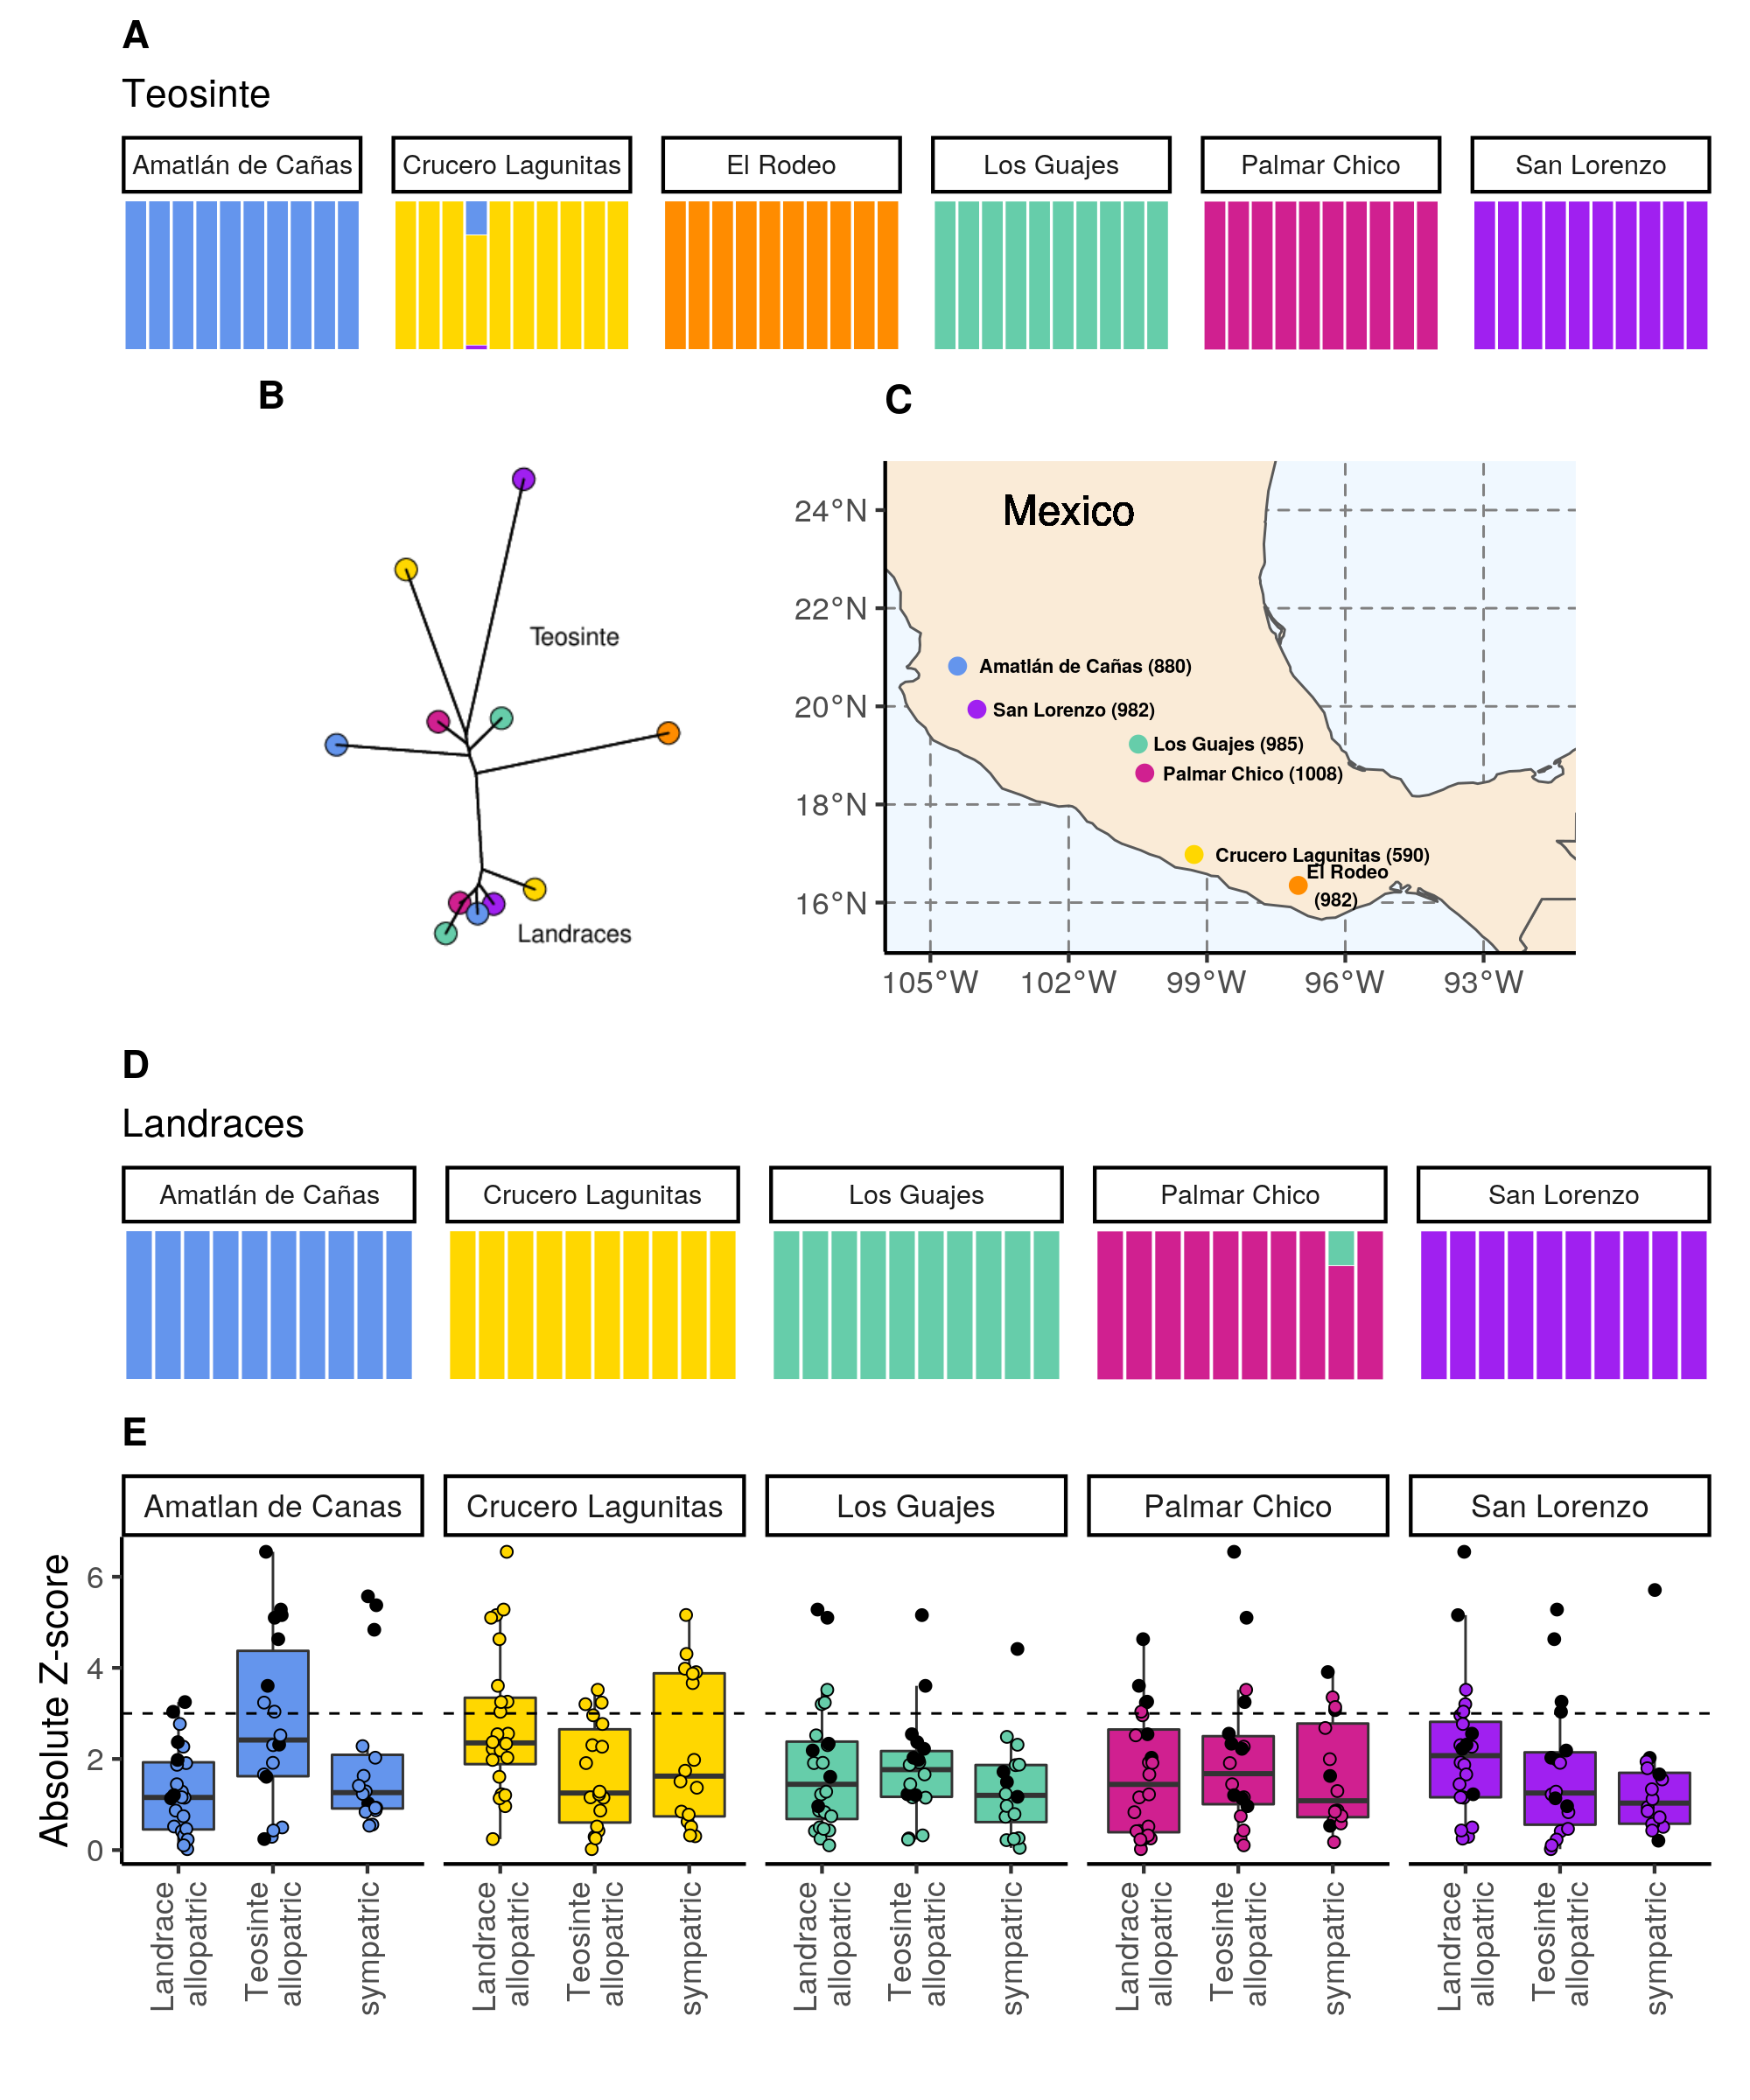

In [41]:
options(repr.plot.width = 10, repr.plot.height = 12, repr.plot.res = 200)

tree_string <- read.tree(text = readLines(gzfile("../data/angsd_treemix/v5_treemix.treeout.gz")))
tree_string <- drop.tip(tree_string, tip = c("Teo--random1_Palmar_Chico", "Teo--random2_Palmar_Chico", "LR--random1_Palmar_Chico", "LR--random2_Palmar_Chico"))


dge <- 110
#png(filename = "../figures/raw_tree.png", res = 300, width = 5, height = 5, units = "in")
pdf("../figures/raw_tree.pdf", width = 5, height = 5)
par(mar = c(0,0,0,0)*1.1)
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = dge, edge.width = 2, no.margin = TRUE)

tip_str <- str_replace(tree_string$tip.label, "--", "_")
tip_pch <- ifelse(grepl("Teo", x = tip_str), 21, 24)
tiplabels(pch = 21, bg = color_df$color[match(tip_str, color_df$pop)], cex = 3)
#box()
text(0.08,0.0, "Landraces", cex = 1.5)
text(0.08,0.1, "Teosinte", cex = 1.5)

par(new=TRUE)
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = dge, edge.width = 2, no.margin = TRUE)

legend_df <- color_df %>% 
    mutate(pop = str_replace(pop, pattern = "(LR|Teo)_(.)", "\\2") %>% str_replace("random(1|2)_", "")) %>% 
    distinct() %>% 
    filter(pop != "random")
#legend('right', cex = 1, legend_df$pop, pch = 21, pt.bg = legend_df$color, ncol = 1)
dev.off()

treeplot <- image_ggplot(image_read("../figures/raw_tree.pdf"), interpolate = TRUE) + theme(plot.margin = margin(0, 0, 0, 0, "cm"))

Teo_structure_10 + ggtitle(label = "A", subtitle = "Teosinte") + theme(plot.title = element_text(size = tts, face = "bold")) +  
((treeplot + ggtitle(label = "B\n") + theme(plot.title = element_text(size = tts, face = "bold"))) | 
 (pop_map + ggtitle(label = "C")) + theme(plot.title = element_text(size = tts, face = "bold")))  +
LR_structure_10 + ggtitle(label = "D", subtitle = "Landraces") +  theme(plot.title = element_text(size = tts, face = "bold")) +
f4_plot + ggtitle(label = "E") + theme(plot.title = element_text(size = tts, face = "bold")) +
plot_layout(ncol = 1, heights = c(1,3,1,2))
ggsave("../figures/Figure1.pdf", width = 10, height = 12)

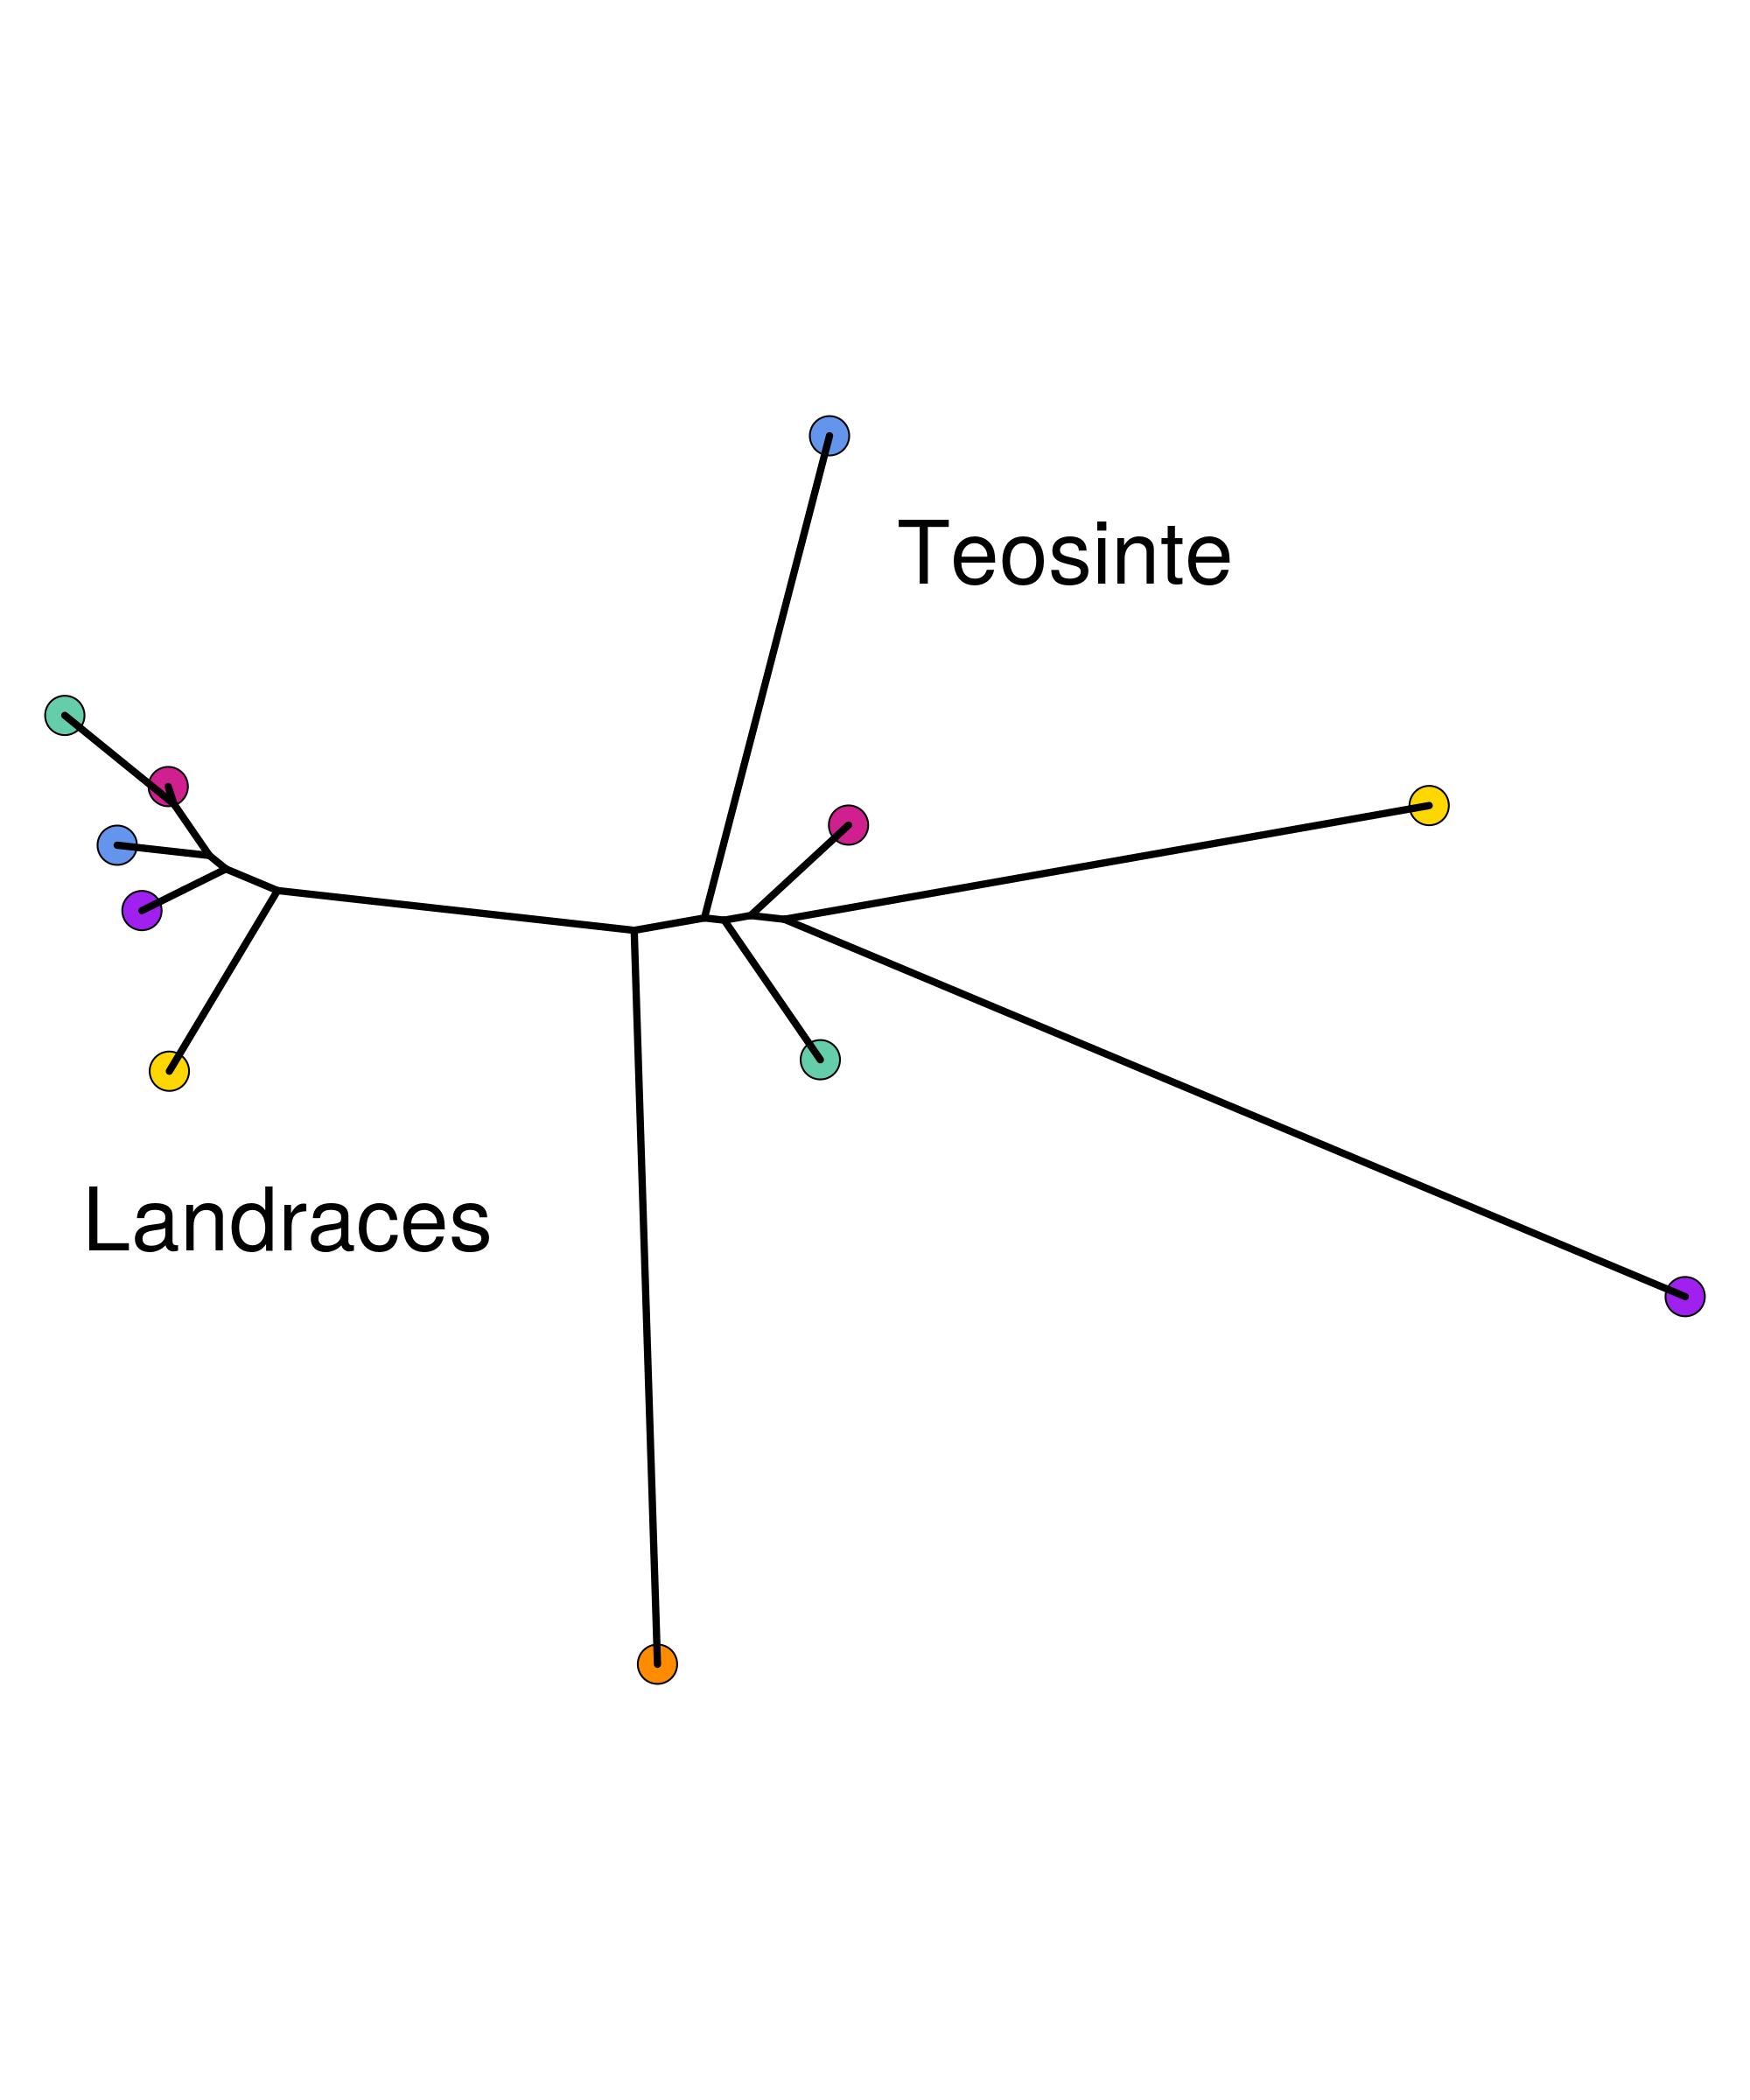

In [13]:
dge  <- 10
par(mar = c(0,0,0,0)*1.1)
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = dge, edge.width = 2, no.margin = TRUE)
tip_str <- str_replace(tree_string$tip.label, "--", "_")
tiplabels(pch = 21, bg = color_df$color[match(tip_str, color_df$pop)], cex = 3)
#box()
text(0.02, 0.04, "Landraces", cex = 3)
text(0.09, 0.1, "Teosinte", cex = 3)

par(new=TRUE)
plot.phylo(tree_string, type = "unrooted", show.tip.label = FALSE, 
           rotate.tree = dge, edge.width = 4, no.margin = TRUE)

legend_df <- color_df %>% 
    mutate(pop = str_replace(pop, pattern = "(LR|Teo)_(.)", "\\2") %>% str_replace("random(1|2)_", "")) %>% 
    distinct() %>% 
    filter(pop != "random")